# ¿Qué vende un coche?

En Crankshaft List, cientos de anuncios gratuitos de vehículos se publican en su sitio web cada día. Como Analista de ellos, necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

En este archivo se explica con detalle el procedimiento del análisis de los datos de Crankshaft List. 

El objetivo de este estudio es el siguiente: 
- Determinar qué factores influyen en el precio de un vehículo según los anuncios que se publica en Crankshaft List. 

Para comprobar esto, se iniciará con una exploración general de los datos que tenemos, verificando qué tipo de datosse está manejando, análisis de valores ausentes y duplicados, transformación de los datos, entre otros procesos que se explicarán más adelante.  

Se estudiará los parámetros principales a través de gráficos e indicadores que nos aportarán a llegar a una conclusión para verificar qué variables influyen en el precio de un vehículo. 

# Table of Contents <a id='back'></a>

* [1. Inicialización](#ini)
    * [1.1 Cargar datos](#cargar_datos)
    * [1.2 Explorar datos iniciales](#explorar_datos)
    * [1.3 Conclusiones y siguientes pasos](#conclusiones)
* [2. Tratar los valores ausentes](#valores_ausentes)
    * [Limpieza `is_4wd`](#is_4wd)
    * [Limpieza `paint_color`](#paint_color)
    * [Limpieza `odometer`](#odometer)
    * [Limpieza `cylinders`](#cylinders)
    * [Limpieza `model_years`](#model_year)
* [3. Corregir los tipos de datos](#corregir_datos)
* [4. Enriquecer datos](#enriquecer_datos)
* [5. Comprobar datos limpios](#datos_limpios)
* [6. Estudiar parámetros principales](#para_principales)
* [7. Estudiar y tratar valores atípicos](#valores_atipicos)
    * [7.1 Corregir límites en `price`](#lim_price)
    * [7.2 Corregir límites en `car_age`](#lim_car_age)
    * [7.3 Corregir límites en `odometer`](#lim_odometer)
    * [7.4 Corregir límites en `average_mileage_yearly`](#lim_amy)
    * [7.5 Corregir límites en `condition`](#lim_condition)
    * [7.6 Revisión general con nuevos límites](#nuevos_limites)
* [8. Estudiar parámetros principales sin valores atípicos](#estud_parametros)
* [9. Periodo de colocación de los anuncios](#estud_anuncios)
* [10. Precio promedio por cada tipo de vehículo](#precio_promedio)
* [11. Factores de precio](#fact_precio)
* [12. Conclusiones](#end)

<div id='ini'/>

## Inicialización

Iniciamos instalando una librería que se utilizará en el documento.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Procedemos a cargar todas las librerías de python que se utilizarán a lo largo del archivo.

In [2]:
# librerías
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.mstats as mstats

[Volver a Contenidos](#back)

<div id='cargar_datos'/>

### Cargar datos

Cargamos los datos en el notebook para mirar la información inicial. 

In [3]:
# Cargar el archivo en un DataFrame
crank = pd.read_csv("/datasets/vehicles_us.csv")

In [4]:
# Visualización nombre de las columnas
print(crank.columns)
# Número de filas y columnas
print(crank.shape)

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')
(51525, 13)


A simple vista, observamos que tenemos de forma correcta el nombre de las columnas y no es necesario renombrarlas. 

Con esto vemos que tenemos en la base de datos 51,525 datos y 13 columnas. 

[Volver a Contenidos](#back)

<div id='explorar_datos'/>

### Explorar datos iniciales

El dataset que se explorará contiene los siguientes campos:
- `price` - precio del carro
- `model_year` - año del modelo del carro
- `model` - modelo del carro
- `condition` - condición del carro
- `cylinders` - cilindraje o número de cilindros del carro
- `fuel` — tipo de combustible: gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` - tipo de transmisión del carro
- `paint_color` - color del carro
- `type` - tipo del carro
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (si o no)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Es importante comprender todos los campos, explorarlos y familiarizarnos con ellos.

Veamos la información general del archivo. 

In [5]:
# información general de la base de datos
crank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Según la información de arriba, tenemos lo siguiente: 
- 4 columnas tipo `float`: `model_year`, `cylinders`, `odometer` y `is_4wd`
- 2 columnas tipo `int`: `price`, `days_listed`
- 7 columnas tipo `object`: `fuel`, `condition`, `transmission`, `type`, `paint_color` y `date_posted`
    - Recordemos que el tipo `object` es `str` en Python.
    
Es necesario explorar cada columna y sus datos para verificar si el tipo de dato es correcto como lo está leyendo Python. 

In [6]:
# muestra de datos
crank.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


De forma visual, desde las primeras 10 filas ya se nota varios valores ausentes en ciertas columnas. Esto se puede comprobar al verificar en la información general, que columnas como `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd` tienen valores ausentes, siendo esta última la que más valores ausentes tiene.

Verifiquemos lo observado con el siguiente código: 

In [7]:
# columnas con valores ausentes
crank.columns[crank.isnull().any()]

Index(['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'], dtype='object')

Comprobamos que realmente estas columnas tienen valores ausentes.

Observemos la cantidad de valores ausentes y el porcentaje de cada una:

In [8]:
# número de valores ausentes por columna
crank.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

price - 0.0%
model_year - 7.02%
model - 0.0%
condition - 0.0%
cylinders - 10.21%
fuel - 0.0%
odometer - 15.32%
transmission - 0.0%
type - 0.0%
paint_color - 17.99%
is_4wd - 50.37%
date_posted - 0.0%
days_listed - 0.0%


Ahora tenemos una visión de los datos más exacta. Como se indicó anteriormente `is_4wd` es la columna con mayor cantidad de valores ausentes, llegando a faltar más del 50% de los datos. ¡Es bastante! Debemos analizar qué está pasando con esta columna y si se puede arreglar los valores ausentes. 

De ahí tenemos va `paint_color` con 17.99% de valores ausentes, `odometer` con 15.32%, `cylinders` con 10.21% y `model_year` con 7.02%.

De igual forma, en todos los casos tenemos una gran cantidad de valores ausentes que es necesario estudiar si se puede rellenar la información de los datos o no. 

Para complementar nuestro análisis, vamos a proceder a utilizar la librería `missigno` que nos permitirá ver de forma visual con más detalle los valores ausentes en la base de datos de `crank`. 

<AxesSubplot:>

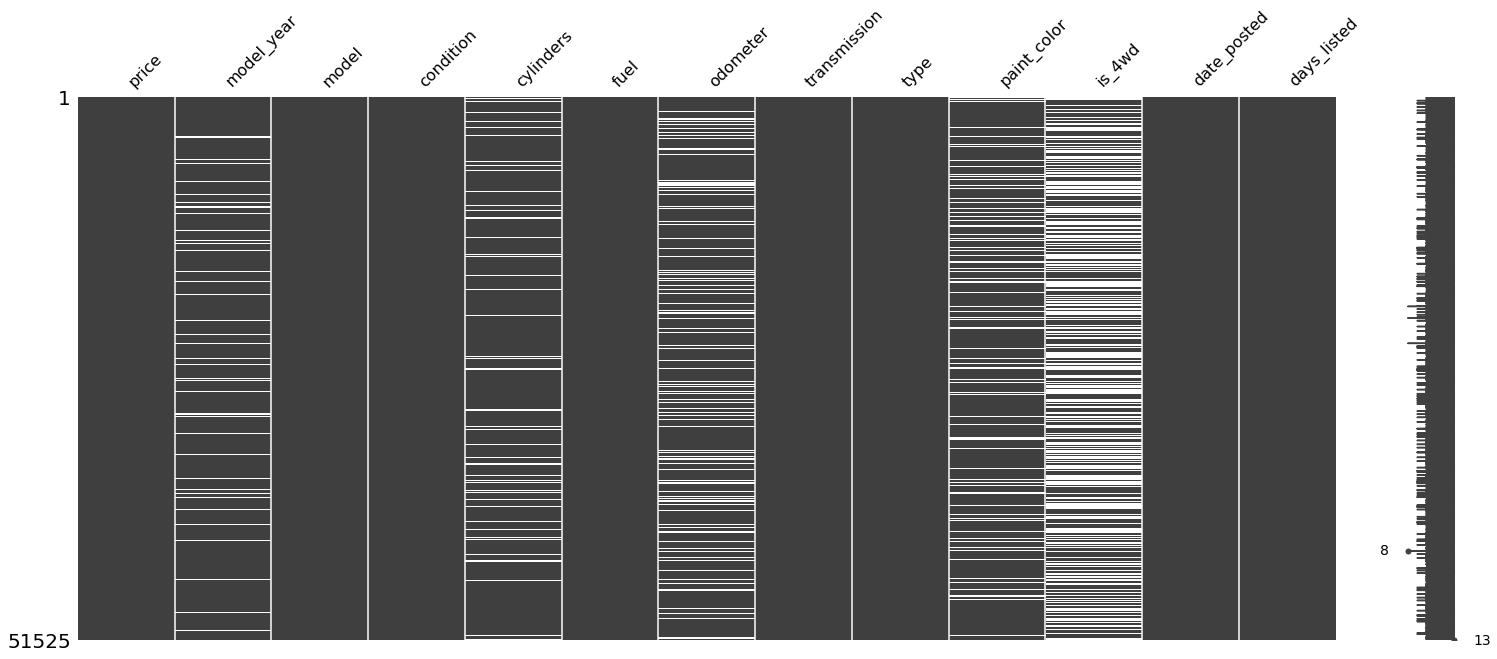

In [10]:
# matrix de visualización de valores ausentes
msno.matrix(crank)

Al parecer los valores ausentes están repartidos por todo lado de forma aleatoria, y cada columna de forma diferente.

Se comprueba que `is_4wd` tiene una gran cantidad de valores ausentes de forma aleatoria repartida entre todas las columnas, ya que no hay una secuencia o bloque de líneas blancas muy grandes entre sí. 

Ahora comprobemos si alguna fila coincide los valores ausentes con otra columna.

<AxesSubplot:>

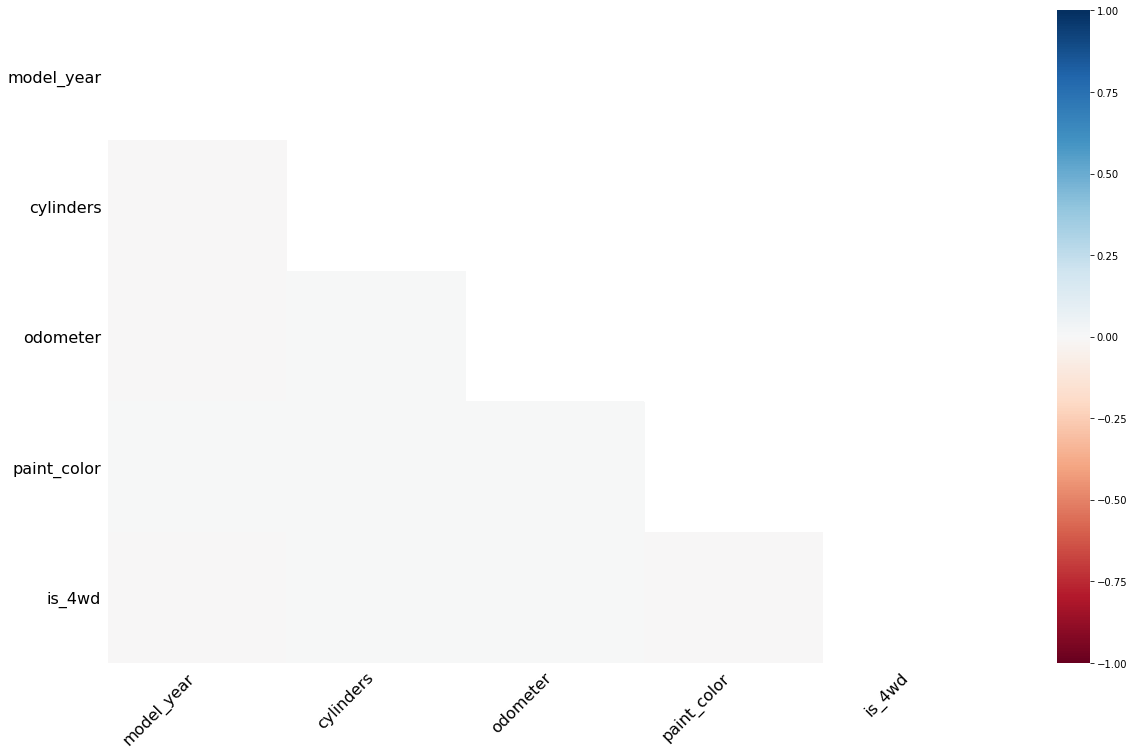

In [11]:
# heatmap de coincidencia de valores ausentes entre columnas
msno.heatmap(crank)

Con el heatmap de arriba podemos observar que hay una correlación de 0 entre todas las variables. Esto quiere decir que no existe una relación lineal entre las variables con respecto a los valores faltantes. En otras palabras, la presencia de valores ausentes en una variable no parece estar relacionada con la presencia de los valores ausentes de la otra. Y esto es para todas las variables. 

Por lo tanto ninguna columna comparte un valor ausente con otra. 

[Volver a Contenidos](#back)

<div id='conclusiones'/>

### Conclusiones y siguientes pasos

La información inicial que se tiene en los datos se debe verificar para poder entender cómo está el comportamiento de los datos a nivel estadístico, cómo se puede reemplazar los valores ausentes y si hay valores duplicados y comprobar si el tipo de dato es correcto. 

Más adelante, se propone comprobar las siguientes hipótesis iniciales: 
- Entre más millaje tiene un carro, más bajo es su precio.
- El modelo del carro influye en el precio del mismo. 
- Según el modelo del carro y la antiguedad del carro, influirá el precio del mismo. 

[Volver a Contenidos](#back)

<div id='valores_ausentes'/>

## Tratar los valores ausentes 

En esta sección se analizará los valores ausentes de las columnas comprobadas anteriormente. 

<div id='is_4wd'/>

### Limpieza `is_4wd` 

Iniciamos con la columna que tiene más valores ausentes `is_4wd` verificando qué valores únicos tiene:

In [12]:
# valores únicos
crank["is_4wd"].unique()

array([ 1., nan])

In [13]:
# tipo dato
crank["is_4wd"].dtypes

dtype('float64')

Tenemos dos datos únicos: `1.0` y `nan`. La variable `is_4wd` indica si el vehículo tiene tracción en las 4 ruedas o no. Según la información proporcionada, sabemos que el tipo de dato es Booleano, y actualmente está como tipo `float`. En base a esto, se puede concluir que los datos ausentes deben tener valor `0`, ya que lo demás que tenemos relleno es `1.0`.  

Se procede a rellenar los `nan` con `0`, para luego convertirlo en `bool`. 

In [14]:
# rellenar valores ausentes con 0
crank["is_4wd"] = crank["is_4wd"].fillna(0)

In [15]:
# rellenar valores ausentes con 0
crank["is_4wd"] = crank["is_4wd"].astype('bool')

Comprobamos la información cambiada y el número de valores ausentes en `is_4wd`:

In [16]:
# valores únicos y tipo de dato
print(crank["is_4wd"].unique())
print(crank["is_4wd"].dtypes)

[ True False]
bool


In [17]:
# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

price - 0.0%
model_year - 7.02%
model - 0.0%
condition - 0.0%
cylinders - 10.21%
fuel - 0.0%
odometer - 15.32%
transmission - 0.0%
type - 0.0%
paint_color - 17.99%
is_4wd - 0.0%
date_posted - 0.0%
days_listed - 0.0%


Queda completamente limpia esta columna, y procedemos a seguir con las demás. 

[Volver a Contenidos](#back)

<div id='paint_color'/>

### Limpieza `paint_color`

Continuamos el análisis con la columna `paint_color`:

In [18]:
# valores únicos
colors = crank["paint_color"].unique()
print(crank["paint_color"].unique())
print(len(colors))

[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']
13


Vemos que hay 12 tipos de colores, y adicional hay los valores ausentes (`nan`). 

Verifiquemos cuántos valores hay por cada tipo de color y `nan`:  

In [19]:
# conteo de valores y porcentajes
print(crank["paint_color"].value_counts(dropna=False))
print()
print(crank["paint_color"].value_counts(normalize=True, dropna=False))

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

white     0.194643
NaN       0.179854
black     0.149287
silver    0.121184
grey      0.097758
blue      0.086851
red       0.085803
green     0.027094
brown     0.023736
custom    0.022377
yellow    0.004949
orange    0.004483
purple    0.001980
Name: paint_color, dtype: float64


Vemos que la segunda categoría más alta es `NaN` con 9,267, que representa el 18% de los datos, por lo que son bastantes para poder reemplazar con el color que más se repite (`white`) o con el resto. 

En este caso para poder eliminar los valores `NaN` se procede a rellenar con la categoría `unspecified` que es "sin especificar", ya que se asume que la razón por la que hay valores vacíos es porque las personas que publicaron los anuncios, no especificaron el color. 

In [20]:
# rellenar valores ausentes con "sin especificar"
crank["paint_color"] = crank["paint_color"].fillna("unspecified")

Comprobamos los valores y que se haya eliminado los `NaN`:

In [21]:
# distribución de datos
print(crank["paint_color"].value_counts(normalize=True, dropna=False))

white          0.194643
unspecified    0.179854
black          0.149287
silver         0.121184
grey           0.097758
blue           0.086851
red            0.085803
green          0.027094
brown          0.023736
custom         0.022377
yellow         0.004949
orange         0.004483
purple         0.001980
Name: paint_color, dtype: float64


In [22]:
# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

price - 0%
model_year - 7%
model - 0%
condition - 0%
cylinders - 10%
fuel - 0%
odometer - 15%
transmission - 0%
type - 0%
paint_color - 0%
is_4wd - 0%
date_posted - 0%
days_listed - 0%


[Volver a Contenidos](#back)

<div id='odometer'/>

### Limpieza `odometer`

Ahora analicemos la columna `odometer`:

In [23]:
# filas x columnas iniciales
print(crank.shape)

(51525, 13)


In [24]:
# valores únicos
print(crank["odometer"].unique())
print(crank["odometer"].dtypes)

[145000.  88705. 110000. ... 121778. 181500. 139573.]
float64


Los datos que tenemos en `odometer` son tipo `float`, sin embargo, al parecer ninguno tiene un valor decimal importante, ya que solo terminan con `.0`. 

Verifiquemos si hay valores que se repiten entre sí o no. 

In [25]:
# distribución de datos y conteo
print(crank["odometer"].value_counts(normalize=True, dropna=False).head(20))
print()
print(crank["odometer"].value_counts(dropna=False).head(20))

NaN         0.153168
0.0         0.003590
140000.0    0.003552
120000.0    0.003474
130000.0    0.003455
160000.0    0.003241
200000.0    0.003222
180000.0    0.003125
150000.0    0.003105
170000.0    0.002834
110000.0    0.002348
122000.0    0.002154
185000.0    0.002135
135000.0    0.002077
129000.0    0.002077
152000.0    0.002057
190000.0    0.002057
142000.0    0.002018
105000.0    0.001980
165000.0    0.001941
Name: odometer, dtype: float64

NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
160000.0     167
200000.0     166
180000.0     161
150000.0     160
170000.0     146
110000.0     121
122000.0     111
185000.0     110
135000.0     107
129000.0     107
152000.0     106
190000.0     106
142000.0     104
105000.0     102
165000.0     100
Name: odometer, dtype: int64


Se ve que los valores ausentes `NaN` son los que más forman parte de los valores, de ahí hay carros que tienen 0 millas recorridas, 140000 millas, 120000 millas, en adelante, siendo muy pocos valores (alrededor del 0.3% de datos por categoría) que se repiten entre sí.  

Verifiquemos si es posible agrupar los datos: 

In [26]:
# conteo de valores, por rangos
print(crank["odometer"].value_counts(normalize=True, dropna=False, bins=8))

(-990.001, 123750.0]    0.481184
(123750.0, 247500.0]    0.342902
(247500.0, 371250.0]    0.021252
(371250.0, 495000.0]    0.000990
(495000.0, 618750.0]    0.000175
(742500.0, 866250.0]    0.000155
(618750.0, 742500.0]    0.000097
(866250.0, 990000.0]    0.000078
Name: odometer, dtype: float64


La tabla de arriba está separando en intervalos igualmente espaciados los valores de los millajes. Aunque nos indique que tenemos millajes en negativo (-990) lo que realmente quiere decir es que inicia desde cero la primer categoría. 

Por lo tanto, tenemos que los carros con millaje de 0 a 123,750 millas representan el 48% de los datos. Continuamos con el segundo grupo que son los carros que van desde 123,751 a 247,500 millas con el 34%. Con estos dos grupos se identifica que están más del 80% de los datos. El resto de los datos se encuentran con más millaje. 

Adicional, verifiquemos la indormación estadística: 

In [27]:
# información estadística resumida
crank["odometer"].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Podemos comprobar que el valor mínimo del millaje es 0, y el valor máximo es 990,000 millas. Lo que hay que resaltar aquí es que el 75% de los datos se encuentran con un millaje de 115,000, que también hace relación a lo que comprobamos arriba donde el 82% de los datos tienen hasta 247,500 millas. 

Como se indicó anteriormente, los valores ausentes en `odometer` son aleatorios. Se cree que los dueños de los carros no publicaron el millaje para no dar a conocer ese dato sobre sus carros. Analizando de forma general, cuando una persona quiere comprar un carro usado, es importante saber cuántas millas ha recorrido el carro para saber cuánto se ha usado, y así ver si su precio es coherente o no, en base al modelo, año y tipo de carro. 

Se considera que si se elimina completamente los valores ausentes de la columna `odometer`, se podría perder datos importantes, por lo que sí se podría rellenar la información. La mejor forma es obtenieniendo la mediana (tomando en cuenta que tenemos valores atípicos en esta columna) según `model`, `model_year` y `type`, de esta forma estamos utilizando información más certera sobre los valores ausentes. 

Para comenzar, procedemos a crear una variable `grouped_odometer` que agrupará las tres columnas nombradas anteriormente en base a la mediana de `odometer`. 

In [28]:
# agrupamiento de datos por model, model_year y type, obteniendo la mediana de odometer
grouped_odometer = crank.groupby(['model', 'model_year', "type"])["odometer"].median()
# reseteamos el índice
grouped_odometer = grouped_odometer.reset_index()

In [29]:
# imprimimos la tabla
display(grouped_odometer)
print("\n", grouped_odometer.shape)

,model,model_year,type,odometer
0,acura tl,1999.0,sedan,196000.0
1,acura tl,2001.0,sedan,177770.0
2,acura tl,2002.0,sedan,189200.0
3,acura tl,2003.0,sedan,142500.0
4,acura tl,2004.0,other,173454.0
...,...,...,...,...
4061,volkswagen passat,2014.0,sedan,74931.0
4062,volkswagen passat,2015.0,sedan,69000.0
4063,volkswagen passat,2016.0,sedan,41000.0
4064,volkswagen passat,2017.0,sedan,31755.0



 (4066, 4)


Con esta tabla, se va a unir al DataFrame principal `crank` en base a las tres columnas: `model`, `model_year` y `type`, para incluir la columna `odometer_median`. 

In [30]:
# unión de crank con grouped_odometer, incluyendo la columna "odometer_median"
crank = crank.merge(grouped_odometer, on=['model', 'model_year', "type"], suffixes=['', '_median'], how="left")

# filas iniciales y finales
display(crank.head(10))
print()
display(crank.tail(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_median
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,114000.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,108489.5
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unspecified,False,2019-03-22,9,168500.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,80903.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,89000.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,70000.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,118698.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unspecified,True,2018-07-16,19,104174.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,147191.0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_median
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,True,2018-08-18,52,223822.5
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,True,2018-11-01,51,122000.0
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,False,2019-04-19,44,108000.0
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,144260.5
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,unspecified,False,2018-11-24,89,12250.0
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,102300.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,154727.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,117100.0
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,101862.0
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,unspecified,False,2018-06-05,10,99800.0


Al parecer tenemos valores vacíos en `odometer_median`. Revisemos cuántos son:

In [31]:
# número de valores ausentes por columna
print(crank.isna().sum())
print(crank.shape)

price                 0
model_year         3619
model                 0
condition             0
cylinders          5260
fuel                  0
odometer           7892
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
odometer_median    3834
dtype: int64
(51525, 14)


Esto es importante porque puede ser que no encontremos un valor para todos los valores ausentes en `odometer`. 

De todos modos, procedemos a reemplazar los valores ausentes de `odometer` en base a la columna `odometer_median`. 

In [32]:
# reemplazar datos de odometer en base a odometer_median
crank['odometer'] = crank['odometer'].fillna(crank['odometer_median'])

# eliminación de columna odometer_median
crank = crank.drop('odometer_median', axis=1)

Verificamos nuevamente los valores ausentes: 

In [33]:
# número de valores ausentes por columna
print(crank.isna().sum())

# filas x columnas
print(crank.shape)

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer         764
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64
(51525, 13)


In [34]:
# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

price - 0.0%
model_year - 7.02%
model - 0.0%
condition - 0.0%
cylinders - 10.21%
fuel - 0.0%
odometer - 1.48%
transmission - 0.0%
type - 0.0%
paint_color - 0.0%
is_4wd - 0.0%
date_posted - 0.0%
days_listed - 0.0%


Tenemos aún 764 valores ausentes en `odometer` que representa el 1.48%. Es un porcentaje bastante pequeño, sin embargo, podemos proceder a realizar varias combinaciones y rellenar los datos ausentes, como utilizando solo `type` y `model`, tomando en cuenta que `model_year` tenemos bastantes valores ausentes. 

Para no repetir el código procedemos a crear una función que nos permita a reemplazar los valores ausentes en base a varias columnas y la agrupación de otra. Se cree que esta función servirá a lo largo del análisis: 

In [35]:
# función fill_na_by_group
def fillna_by_group(data, group_cols, value_col, agg_func='median', fillna_func='fillna'):
    """
    Función que rellena los valores ausentes de un DataFrame en pandas al reagrupar por una o más columnas, en base a 
    la mediana de la variable con valores que se agrupa. Al reagrupar, se agrega estos valores como una nueva columna 
    en el df original, y se procede a reemplazar los valores ausentes según este dato. Se elimina la columna agregada 
    y se retorna el df.
    """
    # agrupamiento de los datos por columnas y la mediana
    group_data = data.groupby(group_cols)[value_col].agg(agg_func)

    # reseteo de indice y renombrar la columna con "_agg"
    group_data = group_data.reset_index().rename(columns={value_col: value_col+'_agg'})

    # unión del df original y la tabla anterior en base a las variables definidas al inicio
    merged_data = data.merge(group_data, on=group_cols, how='left')

    # relleno de valores ausentes con la función fillna, utilizando getattr que se combina con fillna
    merged_data[value_col] = getattr(merged_data[value_col], fillna_func)(merged_data[value_col+'_agg'])

    # se elimina la columna agregada al final
    merged_data = merged_data.drop(value_col+'_agg', axis=1)

    return merged_data

In [36]:
# uso de función con model y type para rellenar los últimos valores nulos
crank = fillna_by_group(crank, ['model', 'type'], 'odometer', agg_func='median')

Comprobamos los valores ausentes. 

In [37]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()

# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer          56
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

price - 0.0%
model_year - 7.02%
model - 0.0%
condition - 0.0%
cylinders - 10.21%
fuel - 0.0%
odometer - 0.11%
transmission - 0.0%
type - 0.0%
paint_color - 0.0%
is_4wd - 0.0%
date_posted - 0.0%
days_listed - 0.0%


Finalmente, tenemos solo 56 filas aún con valores ausentes. Procedemos a reemplazar ahora con la columna `type` tomando en cuenta que con `model` se tiene varios valores ausnetes y no se completaría la información faltante. Hay que tomar en cuenta que al reemplazar solo con una variable o columna desde el inicio, se sesgan los datos de `odometer`, alterando la estadística de la columna. Pero como solo se está haciendo a un porcentaje pequeño, no habría problema. Recordar que es mejor realizar esto que eliminar los datos. Estos datos representan menos del 0.15%.  

In [38]:
# uso de función con model y type para rellenar los últimos valores nulos
crank = fillna_by_group(crank, ['type'], 'odometer', agg_func='median')

Comprobamos:

In [39]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()

# % de missing values por columna
for col in crank.columns:
    pct_missing = np.mean(crank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

price - 0.0%
model_year - 7.02%
model - 0.0%
condition - 0.0%
cylinders - 10.21%
fuel - 0.0%
odometer - 0.0%
transmission - 0.0%
type - 0.0%
paint_color - 0.0%
is_4wd - 0.0%
date_posted - 0.0%
days_listed - 0.0%


Se ha limpiado completamente la columna `odometer` sin eliminar ninguna fila. 

[Volver a Contenidos](#back)

<div id='cylinders'/>

### Limpieza `cylinders` 

Ahora procedamos a limpiar `cylinders`, realizando el mismo proceso que en las anteriores columnas. 

In [40]:
# valores únicos
print(crank["cylinders"].unique())
print()

# distribución de datos y conteo
print(crank["cylinders"].value_counts(normalize=True, dropna=False))

[ 6.  4.  8. nan  5. 10.  3. 12.]

8.0     0.307501
6.0     0.304706
4.0     0.269073
NaN     0.102086
10.0    0.010655
5.0     0.005279
3.0     0.000660
12.0    0.000039
Name: cylinders, dtype: float64


Un 10% de los datos de `cylinders` son valores ausentes. 

Para no perder información valiosa, se procede a rellenar la información de los valores ausentes. 

La técnica que se utilizará será parecida a la que se usó para rellenar el millaje en la columna `odometer`, pero en vez de utilizar la mediana, se utilizará la moda. La razón es que por cada tipo, modelo de carro y año del modelo de carro, es más útil saber cuál es el número de cilindros que más se repite que otro dato estadístico.

Adicional, hay que tomar en cuenta que el número de cilindros es un dato numérico entero y no decimal, por lo que se convertirá en `int`. 

Para esto, se aplica la función `fillna_by_group`, obteniendo información sobre la moda según `type`, `model` y `model_year`. 

Para usar la moda se utiliza la siguiente función: 

In [41]:
# se crea una función para aplicar la moda
def mode(x):
    return mstats.mode(x, axis=None)[0]

In [42]:
# uso de función con type model y model_year para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["type", "model", "model_year"], "cylinders", agg_func = mode)

In [43]:
# distribución de datos y conteo
print(crank["cylinders"].value_counts(normalize=True, dropna=False))

8.0     0.337933
6.0     0.335526
4.0     0.297040
NaN     0.011664
10.0    0.011412
5.0     0.005706
3.0     0.000679
12.0    0.000039
Name: cylinders, dtype: float64


In [44]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price              0
model_year      3619
model              0
condition          0
cylinders        601
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

(51525, 13)


Como podemos ver, la distribución de los datos no fue alterada de forma general, hemos podido completar la mayoría de los datos, teniendo aún 595 valores ausentes. Procedemos a realizar lo mismo, donde quitamos `model_year` y dejamos las otras dos variables. 

In [45]:
# uso de función con type model y model_year para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["type", "model"], "cylinders", agg_func = mode)

In [46]:
# distribución de datos y conteo
print(crank["cylinders"].value_counts(normalize=True, dropna=False))

8.0     0.341834
6.0     0.339350
4.0     0.300378
10.0    0.011431
5.0     0.005745
3.0     0.000679
NaN     0.000543
12.0    0.000039
Name: cylinders, dtype: float64


In [47]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price              0
model_year      3619
model              0
condition          0
cylinders         28
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

(51525, 13)


Perfecto, hemos procedido a rellenar la mayoría de los valores ausentes, por lo que decidimos de igual forma rellenar en base a la última categoría, `model`. 

In [48]:
# uso de función con type model y model_year para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["model"], "cylinders", agg_func = mode)

Comprobamos:

In [49]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

(51525, 13)


Finalmente procedemos a corregir el tipo de dato en la columna, según lo indicado al inicio: 

In [50]:
# conversión de tipo de dato
crank["cylinders"] = crank["cylinders"].astype("int")

In [51]:
# distribución de datos y conteo
print(crank["cylinders"].value_counts(normalize=True, dropna=False))

8     0.341989
6     0.339563
4     0.300553
10    0.011431
5     0.005745
3     0.000679
12    0.000039
Name: cylinders, dtype: float64


[Volver a Contenidos](#back)

<div id='model_year'/>

### Limpieza `model_year`

Continuemos analizando la información de `model_year`. Verifiquemos los valores únicos y ordenémosle: 

In [52]:
# valores únicos
sorted_my = crank["model_year"].unique()
sorted_my.sort()
print(sorted_my)

[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]


Tenemos carros desde el año 1908 hasta el 2019. Hay que tomar en cuenta que también aparece como dato único el valor `NaN`. 

Ahora realicemos igual una agrupación de los datos de los años: 

In [53]:
# conteo de valores, por rangos
print(crank["model_year"].value_counts(normalize=True, dropna=False, bins=8))

(2005.125, 2019.0]      0.731295
(1991.25, 2005.125]     0.187909
(1977.375, 1991.25]     0.007511
(1963.5, 1977.375]      0.002659
(1949.625, 1963.5]      0.000272
(1935.75, 1949.625]     0.000058
(1907.888, 1921.875]    0.000039
(1921.875, 1935.75]     0.000019
Name: model_year, dtype: float64


La mayoría de carros publicados son del 2006 al 2019 (73%), de ahí entre los años 1991 al 2005 (18%). El resto son del resto de años. 

Verifiquemos el porcentaje que representa los valores ausentes en `model_year`:

In [54]:
# distribución de datos y conteo
print(crank["model_year"].value_counts(normalize=True, dropna=False))
print()
print(crank["model_year"].value_counts(dropna=False))

NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
            ...   
1948.0    0.000019
1949.0    0.000019
1954.0    0.000019
1936.0    0.000019
1961.0    0.000019
Name: model_year, Length: 69, dtype: float64

NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1949.0       1
1954.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 69, dtype: int64


Los valores ausentes representa el 7% de los datos de `model_year`. Como es prudente no perder información valiosa junto con los valores ausentes, se rellenará información de los años, en base a `model`, `condition` y `type`. Se cree que estas columna influyen en poder obtener más información sobre el año de cada modelo del carro. 

Se procede a utilizar la función `fillna_by_group` anteriormente creada: 

In [55]:
# uso de función con type model y model_year para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["type", "model", "condition"], "model_year", agg_func = "median")

In [56]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price            0
model_year      27
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

(51525, 13)


Se ha logrado rellenar los valores ausentes de la mayoría de datos, excepto de 26. De igual forma, como es un dato bastante pequeño se procede a eliminar el resto de filas que no se encontró reemplazo. 

In [57]:
# uso de función con type y model para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["type", "model"], "model_year", agg_func = "median")

Comprobamos

In [58]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price            0
model_year      10
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

(51525, 13)


Listo, ahora procedemos a reemplazar datos solo con el modelo del carro

In [59]:
# uso de función con model para rellenar los valores nulos de cylinders
crank = fillna_by_group(crank, ["model"], "model_year", agg_func = "median")

Comprobamos

In [60]:
# número de valores ausentes por columna
print(crank.isna().sum())
print()
print(crank.shape)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

(51525, 13)


Finalmente, realizamos la última verificación: 

In [61]:
# mostrar información general
crank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 5.2+ MB


Perfecto, se ha terminado de corregir los valores ausentes en las columnas: 
- `is_4wd`
- `paint_color`
- `odometer`
- `cylinders`
- `model_year`

Se ha mantenido todas las columnas sin eliminar ninguna fila. Esto se realizó a través de reemplazo de los datos por varias variables, desde tres, dos y uno. Tomar en cuenta que al momento de reemplazar los datos por una variable se redujo a una pequeña cantidad de datos. 

[Volver a Contenidos](#back)

<div id='corregir_datos'/>

## Corregir los tipos de datos 

Como los datos ya están completos, y sin valores ausentes, vamos a verificar qué tipos de datos tiene cada columna, según la información impresa anteriormente y analizar si es correcto.

In [62]:
# revisión general de los datos
crank.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19
1,25500,2006.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,168500.0,automatic,pickup,unspecified,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Se tiene como tipo de dato `int` las siguientes columnas: 
- `price`
- `days_listed`
- `cylinders`

Es correcto el manejo de estos tipos de datos para estas columnas, ya que cada una de ellas se debe manejar como un valor entero.

Como tipo `float` se tiene las siguientes columnas: 

- `model_year`
- `odometer`

En este caso, la única columna que debería cambiarse es `model_year` ya que los años son datos enteros. En cuanto a `odometer` puede estar en decimal, según cómo mida la información cada carro. 

Se procede a corregir `model_year`. 

In [63]:
# cambios de tipos de datos
crank["model_year"] = crank["model_year"].astype("int")
# verificación
print(crank["model_year"].dtype)

int64


Como tipo `bool` tenemos la columna `is_4wd` el cual es correcto según la información inicial que nos brindan. 

Por último tenemos las siguientes columnas con tipo `object`: 
- `model`
- `condition`
- `fuel`
- `transmission`
- `type`
- `paint_color`
- `date_posted`

En este caso, el que realmente está incorrecto es `date_posted`, ya que debería tener el formato de fecha para poder trabajar mejor con los datos más adelante, tomando en cuenta los días, meses y años.

Se procede a cambiar el formato a fecha (`datetime`)

In [64]:
# cambiamos a datetime la columna `date_posted`
crank["date_posted"] = pd.to_datetime(crank["date_posted"], format='%Y-%m-%d')

In [65]:
# verificación información general
crank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 5.2+ MB


Con esto, se concluye la corrección de los tipos de datos de todas las columnas.

[Volver a Contenidos](#back)

<div id='enriquecer_datos'/>

## Enriquecer datos 

Es importante enriquecer la base de datos para análisis posteriores. Por lo tanto, se agregará factores adicionales que ayudarán en el análisis posterior.

Se agrega el día de la semana, el mes y el año:

In [66]:
# día de la semana, mes y año de la publicación del anuncio
crank['weekday_posted'] = crank["date_posted"].dt.weekday
crank['month_posted'] = crank["date_posted"].dt.month
crank['year_posted'] = crank["date_posted"].dt.year

Análizamos las nuevas columnas que agregamos: 

In [67]:
# for loop para visualizar la información de arriba
cols = ["weekday_posted", "month_posted", "year_posted"]

for col in cols:
    print('\nFrecuencia de categorías para columna: %s'%col)
    print(crank[col].value_counts(normalize=True).head(10))


Frecuencia de categorías para columna: weekday_posted
3    0.145754
5    0.143464
6    0.142766
0    0.142436
4    0.142339
2    0.141659
1    0.141582
Name: weekday_posted, dtype: float64

Frecuencia de categorías para columna: month_posted
10    0.090112
12    0.088578
3     0.088481
5     0.087394
8     0.086948
7     0.086773
1     0.086405
9     0.086405
11    0.084503
6     0.081824
Name: month_posted, dtype: float64

Frecuencia de categorías para columna: year_posted
2018    0.692538
2019    0.307462
Name: year_posted, dtype: float64


Se puede observar que la distribución de los datos tanto en el día de la semana (`weekday_posted`) como el mes (`month_posted`). En el caso del año en que fue publicado (`year_posted`), hay casi un 70% de datos del año 2018 y un 30% de datos del 2019. 

Con la columna `year_posted` y `model_year` se puede obtener la edad del carro `car_age`. 

In [68]:
# años del vehículo desde cuando el anuncio se colocó (edad vehículo)
crank['car_age'] = (crank['year_posted'] - crank['model_year']) + 1

In [69]:
# resumen estadístico
crank['car_age'].describe()

count    51525.000000
mean         9.523571
std          6.153745
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64

El 75% de los carros tienen máximo 13 años, sin embargo, como valor máximo se tiene un carro de 111 años (carro antiguo). Este es un dato atípico, el cual hay que revisar cuántos casos son. 

Ahora, otra información adicional que necesitamos es el millaje promedio anual, que se puede utilizar con `car_age` y `odometer`. Se procede a dividir entre las dos columnas, creando la columna `average_mileage_yearly`:

In [70]:
# aplicación a la función
crank["average_mileage_yearly"] = crank["odometer"]/crank["car_age"]

In [71]:
# resumen estadístico
crank["average_mileage_yearly"].describe()

count     51525.000000
mean      14622.021494
std        9019.989824
min           0.000000
25%        9714.285714
50%       13200.000000
75%       17750.000000
max      373200.000000
Name: average_mileage_yearly, dtype: float64

Por último, procedemos a cambiar los valores de la columna `condition` con valores numéricos. 

Se define el siguiente diccionario `condition_mapping` y procedemos a reemplazar los datos en la misma columna de `condition`. 

In [72]:
# diccionario de equivalencias
condition_mapping = {
        "new": 5,
        "like new": 4,
        "excellent": 3,
        "good": 2,
        "fair": 1,
        "salvage": 0
}

In [73]:
# actualización de datos
crank['condition'] = crank['condition'].map(condition_mapping)

Visualizamos las primeras filas con los nuevos datos:  

In [74]:
# visualización de información
crank.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2006,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,13,6823.461538
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,168500.0,automatic,pickup,unspecified,False,2019-03-22,9,4,3,2019,17,9911.764706
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


[Volver a Contenidos](#back)

<div id='datos_limpios'/>

## Comprobar datos limpios

Una vez realizado todos estos cambios, vamos a verificar nuevamente de forma rápida los datos e información que se tiene.

In [75]:
# impresión de información general/resumida sobre el DataFrame
crank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   51525 non-null  int64         
 1   model_year              51525 non-null  int64         
 2   model                   51525 non-null  object        
 3   condition               51525 non-null  int64         
 4   cylinders               51525 non-null  int64         
 5   fuel                    51525 non-null  object        
 6   odometer                51525 non-null  float64       
 7   transmission            51525 non-null  object        
 8   type                    51525 non-null  object        
 9   paint_color             51525 non-null  object        
 10  is_4wd                  51525 non-null  bool          
 11  date_posted             51525 non-null  datetime64[ns]
 12  days_listed             51525 non-null  int64 

Comprobamos que todos nuestros datos, junto a las nuevas columnas han sido reemplazadas correctamente, sin generar valores nulos.

Hechamos un vistazo de los datos iniciales y finales, tanto como un resumen estadístico de los mismos.

In [76]:
# imprimir una muestra de datos
crank.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2006,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,13,6823.461538
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,168500.0,automatic,pickup,unspecified,False,2019-03-22,9,4,3,2019,17,9911.764706
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


In [77]:
# imprimir una muestra de datos
crank.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,6,23262.166667
51524,6300,2014,nissan altima,2,4,gas,99800.0,automatic,sedan,unspecified,False,2018-06-05,10,1,6,2018,5,19960.000000


In [78]:
# imprimir una muestra de datos
crank.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.783891,2.637535,6.121048,115389.315827,39.55476,3.005434,6.628491,2018.307462,9.523571,14622.021494
std,10040.803015,6.140029,0.712447,1.658833,62742.866731,28.20427,1.997759,3.474134,0.461447,6.153745,9019.989824
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,72123.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9714.285714
50%,9000.000000,2011.000000,3.000000,6.000000,114000.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,13200.000000
75%,16839.000000,2014.000000,3.000000,8.000000,153000.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,17750.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


Finalmente, verificamos que no hay ningún dato raro entre las columnas numéricas. 

[Volver a Contenidos](#back)

<div id='para_principales'/>

## Estudiar parámetros principales

Ahora que se tiene toda la base de datos limpia, es importante estudiar cómo están los datos de forma visual. Ya se ha revisado en algunos casos cómo están las categorías que más se repiten, así como también los datos estadísticos.  

Se realizará histogramas alrededor de distintos parámetros para estudiar cómo están los valores distribuidos y si en alguna variable y cateogoría es afectada por datos atípicos.

Los parámetros que se estudiarán son los siguientes:
- `price`
- `car_age`
- `odometer`
- `average_mileage_yearly`
- `cylinders`
- `condition`

Comenzamos separando los parámetros que realmente necesitamos, para poder hacer más rápido el análisis.

In [79]:
# separación columnas para for loop
crank_parameters = crank.loc[:, ("price", "car_age", "odometer", "average_mileage_yearly", "cylinders", "condition")]

Se crea un for loop para generar un histograma cada columna de `crank_parameters` con 50 bins.

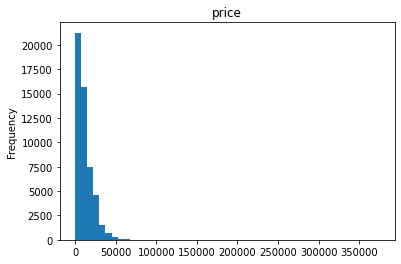

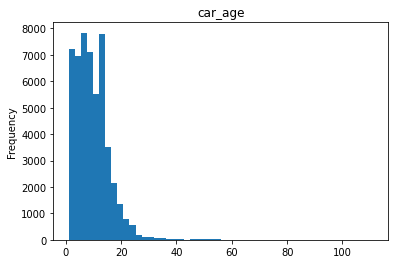

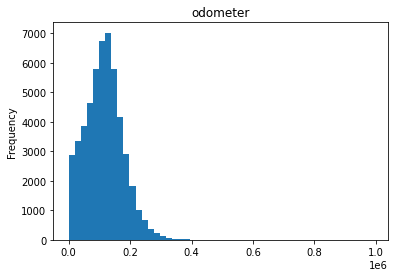

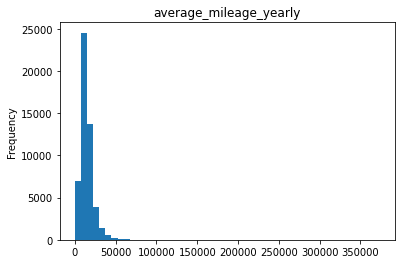

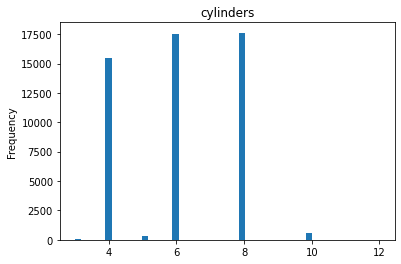

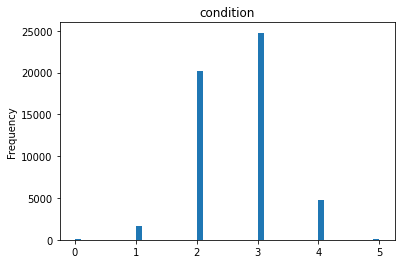

In [80]:
# for loop de histogramas 
for col in crank_parameters:
    crank_parameters[col].plot(kind="hist", bins=50, title=col)
    plt.show()

Podemos visualizar los histogramas de los 6 parámetros. 

Se observa que en `price`, `car_age`, `odometer` y `average_mileage_yearly` hay datos atípicos, que hacen que los valores agrupados estén más centrados a la izquierda, y hay datos atípicos hacia la derecha que generan ruido. 

A nivel de `cylinders` vemos que la distribución de los datos recae más en los números de cilindros 4, 6 y 8 cilindros, y muy pocos en 3, 5 y 10 (tal como se comprobó en la distribución de los datos). Los datos atípicos serían entre 3 y 10.

A nivel de `condition` se ve que la mayoría de los datos estan entre 1 y 4 (fair and like new), teniendo como valores atípicos los datos 0 y 5 (new y salvage). 

Para cada caso es importante estudiar y tratar los valores atípicos, para analizar de mejor manera los datos. 

[Volver a Contenidos](#back)

<div id='valores_atipicos'/>

## Estudiar y tratar valores atípicos

Para analizar los valores atípicos, es importante utilizar la herramienta de boxplot (diagrama de caja y bigote).

Esto se hará para cada parámetro que se analizó anteriormente.

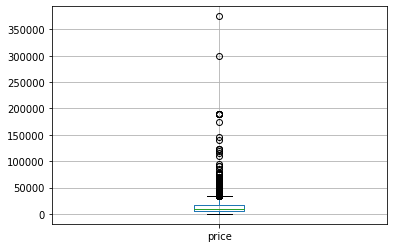

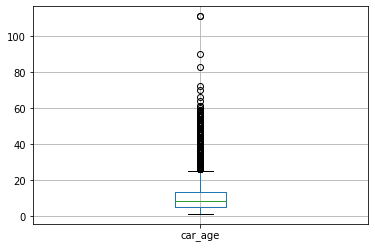

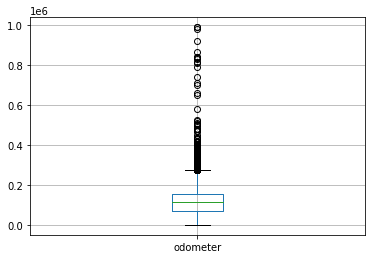

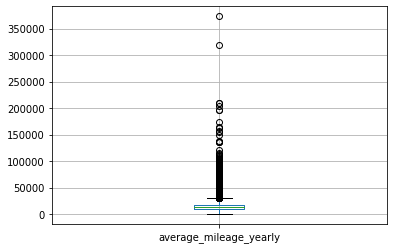

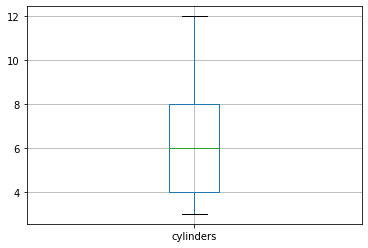

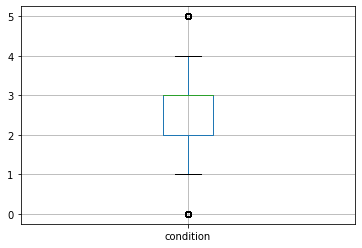

In [81]:
# for loop para graficar boxplots
for col in crank_parameters:
    crank_parameters.boxplot(column=col)
    plt.show()

Como se indicó anteriormente, solo la columna `cylinders` no hay valores atípicos, sin embargo en el resto de las demás columnas si tiene, por lo tanto se debe determinar de mejor manera los límites inferiores y superiores para no tomar en cuenta los valores atípicos tan altos.

[Volver a Contenidos](#back)

<div id='lim_price'/>

### Corregir límites en `price` 

Se inicia el análisis con el parámetro `price`:

In [82]:
# descripción de estadísticos
crank["price"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Con la descripción estadística vemos que el valor mínimo es 1, lo cual es un poco raro que alguien quiera vender un auto a $1.

Revisemos cuántas veces se repite este valor.

Para esto, se realiza un gráfico de conteo de los datos que más se repiten, en este caso, de los 10 primeros:

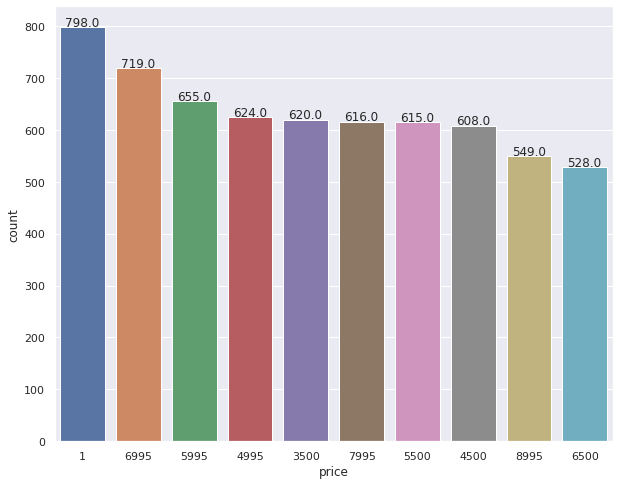

In [83]:
# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="price", data=crank, order=crank.price.value_counts().iloc[:10].index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+2))

Efectivamente, hay 798 anuncios de carros que tenían precio de $1, lo cual es bastante inusual, sin embargo esto realmente sucede. Las personas ponen el precio mínimo para poder llamar más la atención de los compradores y que pregunten sobre el carro y su verdadero precio, generando así más visitas o consultas sobre la publicación. 

Para nuestro análisis este dato no nos sirve, siendo también es un dato atípico.

Verifiquemos los datos menor del percentil 25%:

<AxesSubplot:ylabel='Frequency'>

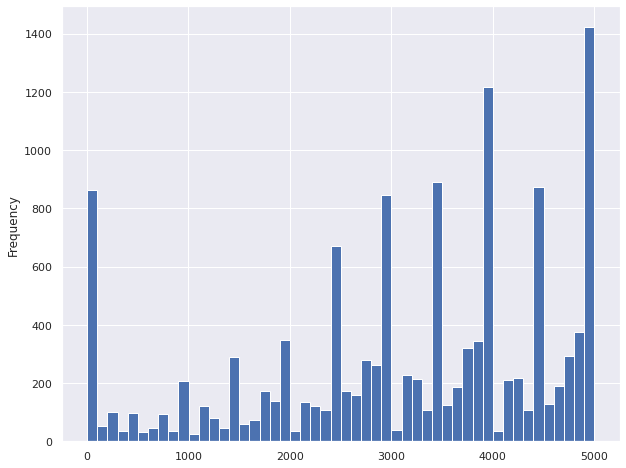

In [84]:
# filtro de datos price entre 1 a 5000
less_data = crank.query('1 <= price <= 5000')
less_data["price"].plot(kind="hist", bins=50)

Como se observa en el gráfico, se tiene bastantes datos con valores a 1, pero también hay valores entre 1 a 1000. Es raro encontrar un carro que cueste $3 o $100, por lo que se cree que estos valores están incorrectos. 

Según este análisis y la información general, el límite inferior que se define para `price` va a ser $1000 como el valor mínimo de lo que se podría vender un automóvil. 

Analicemos para el límite superior: 

In [85]:
# cálculo del límite superior en `price`
q1_price = crank["price"].quantile(0.25)
q3_price = crank["price"].quantile(0.75)
iqr_price = q3_price - q1_price
lim_sup_price = q3_price + 1.5*iqr_price
print(lim_sup_price)

34597.5


El límite superior del precio es $34500. Con estos dos valores, procedemos a definir los dos límites nuevos: 

In [86]:
# definición de límite inferior y superior
good_data = crank.query('1000 <= price <= @lim_sup_price')

In [87]:
# good_data columna price
good_data["price"].describe()

count    48475.000000
mean     11410.624425
std       7692.684119
min       1000.000000
25%       5300.000000
50%       8999.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64

Procedemos a graficar un histograma con la nueva información: 

<AxesSubplot:title={'center':'Price histogram'}, ylabel='Frequency'>

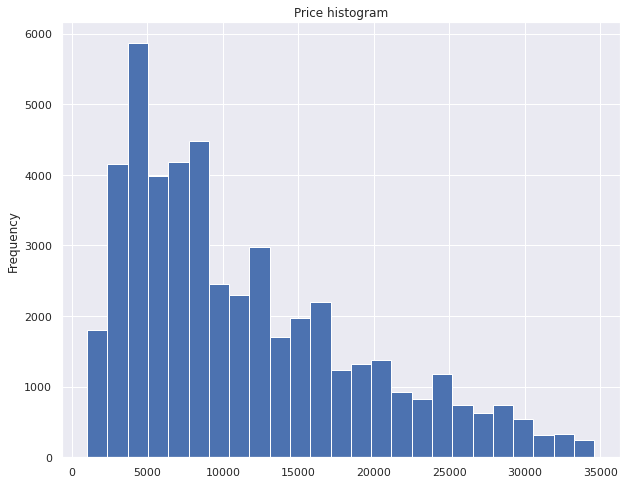

In [88]:
# histograma con nuevos límites
good_data["price"].plot(kind="hist", bins = 25, title="Price histogram")

[Volver a Contenidos](#back)

<div id='lim_car_age'/>

### Corregir límites en `car_age` 

Continuemos con el análisis en `car_age`

In [89]:
# resumen estadístico de `car_age`
good_data["car_age"].describe()

count    48475.000000
mean         9.765900
std          5.978009
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64

Hay carros nuevos (con un año) como también bien antiguos (con 111 años). 

Comprobemos cómo está la distribución de los datos entre el Q1 para abajo:

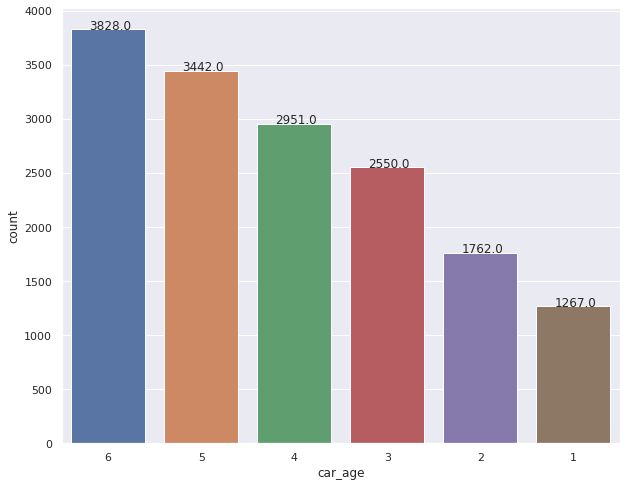

In [90]:
# filtro de datos car_age entre 1 a 6
less_data = good_data.query('1 <= car_age <= 6')

# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="car_age", data=less_data, order=less_data.car_age.value_counts().iloc[:10].index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2))

Vemos que hay 1267 anuncios de carros que tienen 1 año, y 3828 anuncios con 6 años de uso.

Procedemos a definir el límite superior e inferior, tomando los valores de Q1 y Q3 como referencia. 

Como este es un cálculo que volvemos a utilizar, procedemos a crear una función para remover los outliers. 

In [91]:
# función para remover los outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5*iqr
    low_limit = q1 - 1.5*iqr
    filtered = df.query(f"@low_limit < {col} < @up_limit")
    print("upper_limit", col, up_limit)
    print("lowe_limite", col,low_limit)
    
    return filtered

In [92]:
# aplicación de función en `car_age`
good_data = remove_outliers(good_data, "car_age")

upper_limit car_age 23.5
lowe_limite car_age -4.5


Verifiquemos nuevamente la información: 

In [93]:
# resumen estadístico
good_data["car_age"].describe()

count    47474.000000
mean         9.311097
std          4.954783
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         23.000000
Name: car_age, dtype: float64

<AxesSubplot:title={'center':'Car_age histogram'}, ylabel='Frequency'>

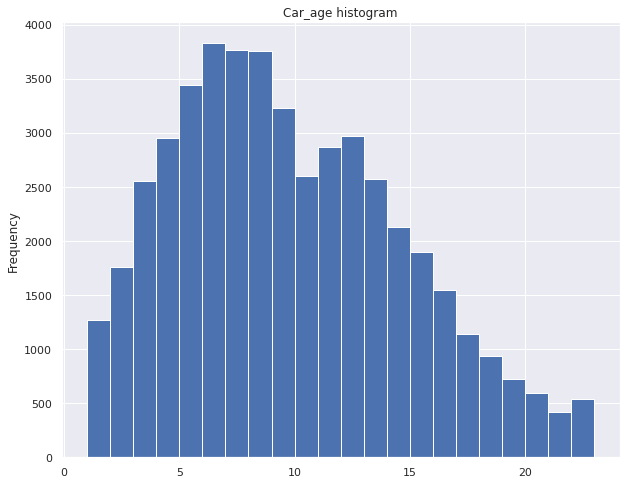

In [94]:
# histograma en car_age
good_data["car_age"].plot(kind="hist", bins = 22, title="Car_age histogram")

Perfecto, tenemos ya limpio los límites de esta columna. 

[Volver a Contenidos](#back)

<div id='lim_odometer'/>

### Corregir límites en `odometer`

In [95]:
# resumen estadístico de `odometer`
good_data["odometer"].describe()

count     47474.000000
mean     118390.171752
std       60712.784149
min           0.000000
25%       77577.500000
50%      117264.000000
75%      154539.000000
max      990000.000000
Name: odometer, dtype: float64

Analicemos nuevamente cómo están los datos debajo del Q1, veamos los primeros 10 valores que más se repiten. 

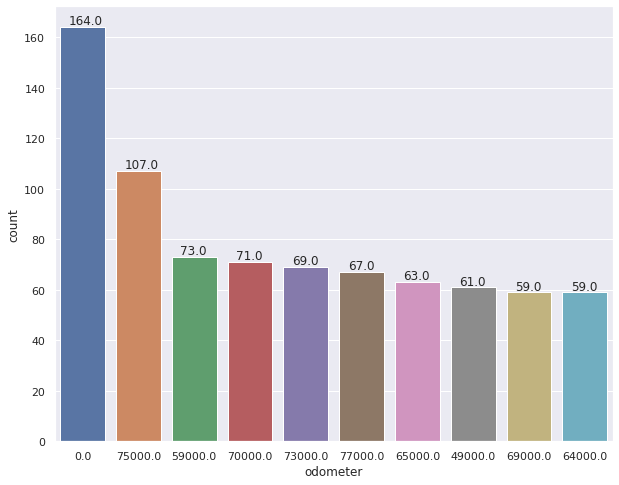

In [96]:
# filtro de datos car_age entre 0 a 78230
less_data = good_data.query('0 <= odometer <= 77577')

# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="odometer", data=less_data, order=less_data.odometer.value_counts().iloc[:10].index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Se tiene una gran cantidad de carros con anuncios que tiene un `odometer` de 0, sin embargo luego la mayor cantidad de anuncios son los que tienen un millaje mayor. 

Procedemos a calcular y aplicar nuevos límites: 

In [97]:
# aplicación de función en `odometer`
good_data = remove_outliers(good_data, "odometer")

upper_limit odometer 269981.25
lowe_limite odometer -37864.75


Veamos nuevamente el histograma: 

<AxesSubplot:title={'center':'Odometer histogram'}, ylabel='Frequency'>

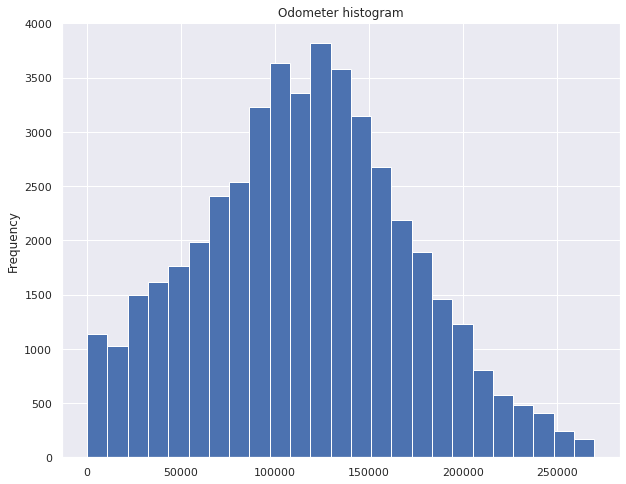

In [98]:
# histograma en odometer
good_data["odometer"].plot(kind="hist", bins=25, title="Odometer histogram")

[Volver a Contenidos](#back)

<div id='lim_amy'/>

### Corregir límites en `average_mileage_yearly`

Revisemos la columna `average_mileage_yearly`: 

In [99]:
# resumen estadístico de `average_mileage_yearly`
good_data["average_mileage_yearly"].describe()

count     46848.000000
mean      14586.421334
std        8092.728122
min           0.000000
25%        9930.000000
50%       13227.666667
75%       17600.000000
max      209000.000000
Name: average_mileage_yearly, dtype: float64

<AxesSubplot:title={'center':'Average Mileage Yearly'}, ylabel='Frequency'>

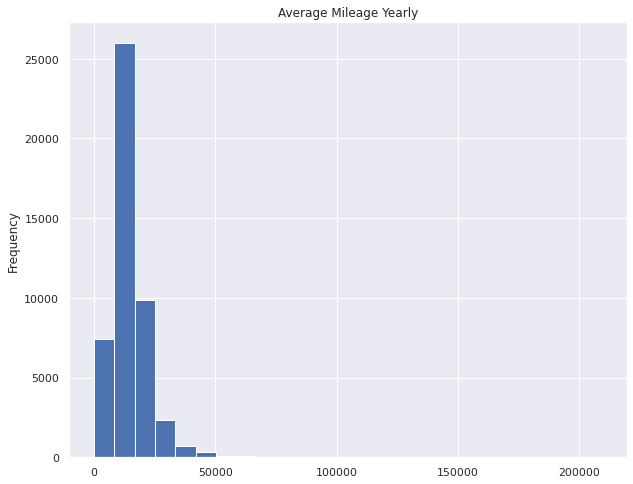

In [100]:
# histograma en average_mileage_yearly
good_data["average_mileage_yearly"].plot(kind="hist", bins=25, title="Average Mileage Yearly")

Analicemos nuevamente cómo están los datos debajo del Q1, veamos los primeros 10 valores que más se repiten. 

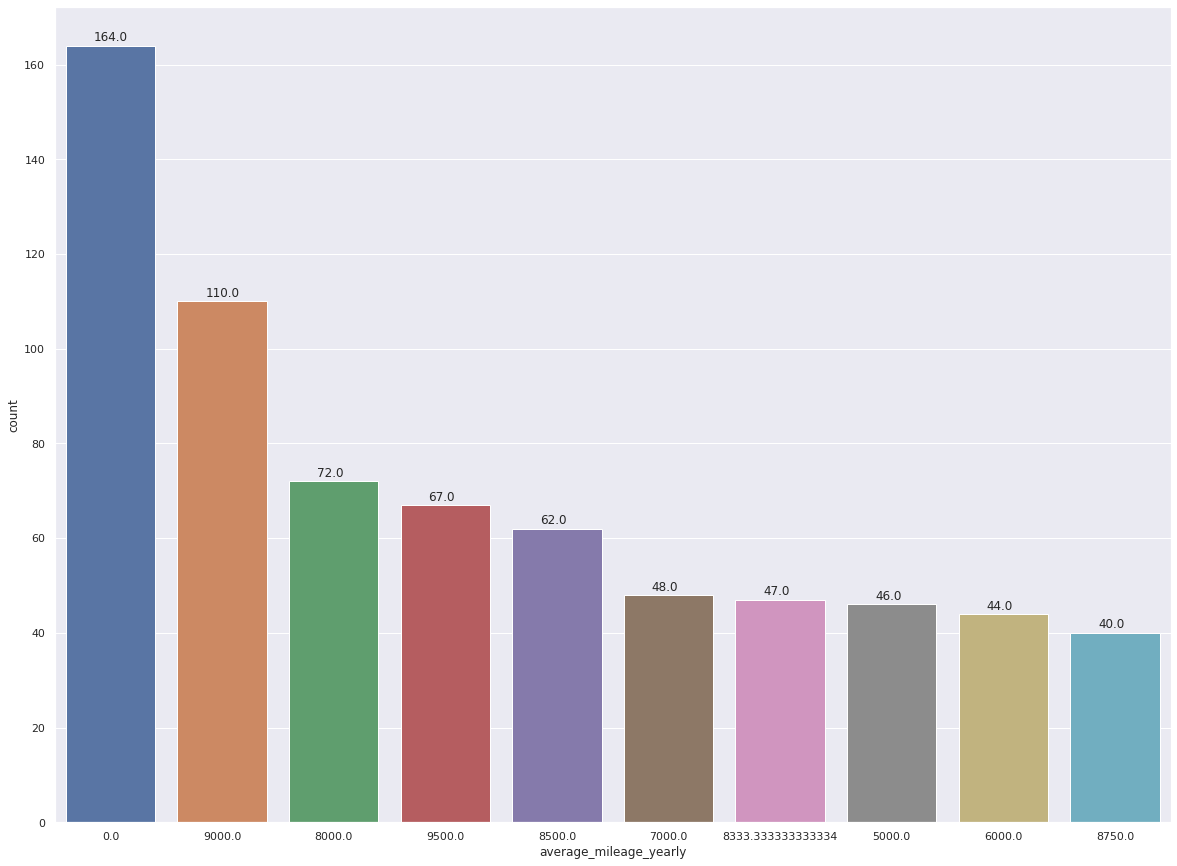

In [101]:
# filtro de datos car_age entre 0 a 78230
less_data = good_data.query('0 <= average_mileage_yearly <= 9930')

# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(20, 15)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="average_mileage_yearly", data=less_data, order=less_data.average_mileage_yearly.value_counts().iloc[:10].index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

Volvemos a observar que tenemos por lo menos 164 carros que tienen un promedio de 0 en el millaje anual, esto quiere decir que son completamente nuevos. 

Procedamos a definir los límites superior e inferior. 

In [102]:
# aplicación de función en `average_mileage_yearly`
good_data = remove_outliers(good_data, "average_mileage_yearly")

upper_limit average_mileage_yearly 29105.0
lowe_limite average_mileage_yearly -1575.0


Verifiquemos la actualización con el histograma: 

<AxesSubplot:title={'center':'Average Mileage Yearly Histogram'}, ylabel='Frequency'>

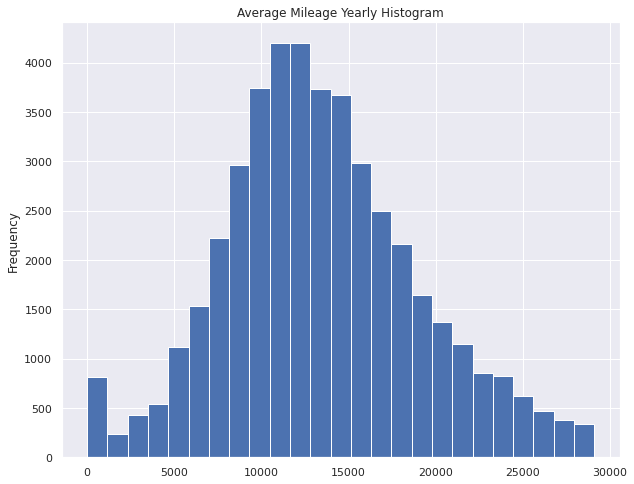

In [103]:
# histograma `average_mileage_yearly`
sns.set(rc={'figure.figsize':(10,8)})
good_data["average_mileage_yearly"].plot(kind="hist", bins=25, title="Average Mileage Yearly Histogram")

[Volver a Contenidos](#back)

<div id='lim_condition'/>

### Corregir límites en `condition`

Por último, verificamos la columna `condition`, para ver cuántos datos tiene los valores 5 y 1. 

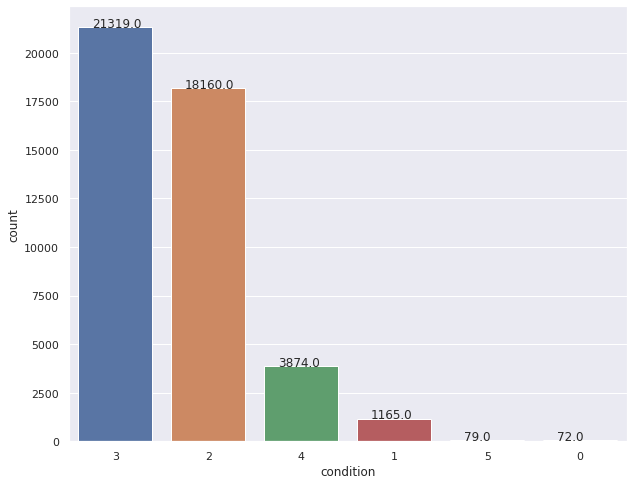

In [104]:
# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="condition", data=good_data, order=good_data.condition.value_counts().iloc[:6].index)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

In [105]:
# resumen estadístico de `condition`
good_data["condition"].describe()

count    44669.000000
mean         2.626721
std          0.692712
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Apenas se tiene 72 carros que son nuevos completamente (aunque vimos que hay 164 que tienen 0 millaje marcado) y 68 que son para rescate, que realmente no se deberían vender. 

En este caso se decide **no eliminar los valores atípicos de la columna condition**. Para no perder información de los carros nuevos como también de los que son para recate. 

Graficamos el histograma para ver cómo está la información. 

<AxesSubplot:title={'center':'Car condition'}, ylabel='Frequency'>

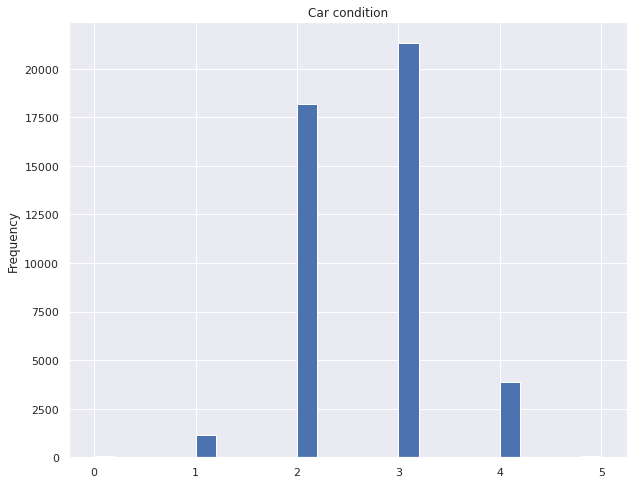

In [106]:
# histograma `condition`
good_data["condition"].plot(kind="hist", bins=25, title="Car condition")

[Volver a Contenidos](#back)

<div id='nuevos_limites'/>

### Revisión general con nuevos límites 

Con esto, se ha finalizado con el tratamiento de los datos atípicos, tanto el límite superior como el inferior. No se procede a realizar ninguna limpieza o modificación de los datos en las columnas `cylinders` y `condition`, ya que la una no tiene datos atípicos, y la otra sus datos atípicos son manejables. 

Se procede a revisar los datos:

In [107]:
# comprobación de datos limpios
good_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2006,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,13,6823.461538
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,168500.0,automatic,pickup,unspecified,False,2019-03-22,9,4,3,2019,17,9911.764706
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


In [108]:
# Visualización de datos generales
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44669 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   44669 non-null  int64         
 1   model_year              44669 non-null  int64         
 2   model                   44669 non-null  object        
 3   condition               44669 non-null  int64         
 4   cylinders               44669 non-null  int64         
 5   fuel                    44669 non-null  object        
 6   odometer                44669 non-null  float64       
 7   transmission            44669 non-null  object        
 8   type                    44669 non-null  object        
 9   paint_color             44669 non-null  object        
 10  is_4wd                  44669 non-null  bool          
 11  date_posted             44669 non-null  datetime64[ns]
 12  days_listed             44669 non-null  int64 

Visualizamos el DataFrame `crank` para ver cómo se tenía antes de realizar la limpieza de datos atípicos. 

In [109]:
# Visualización de datos generales
crank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   51525 non-null  int64         
 1   model_year              51525 non-null  int64         
 2   model                   51525 non-null  object        
 3   condition               51525 non-null  int64         
 4   cylinders               51525 non-null  int64         
 5   fuel                    51525 non-null  object        
 6   odometer                51525 non-null  float64       
 7   transmission            51525 non-null  object        
 8   type                    51525 non-null  object        
 9   paint_color             51525 non-null  object        
 10  is_4wd                  51525 non-null  bool          
 11  date_posted             51525 non-null  datetime64[ns]
 12  days_listed             51525 non-null  int64 

In [110]:
# resta total datos entre crank y good_data
len(crank) - len(good_data)

6856

Hay que tomar en cuenta que al limpiar los datos atípicos, y fijar otros límites superiores e inferiores, se ha perdido un total de 6,856 datos. 

[Volver a Contenidos](#back)

<div id='estud_parametros'/>

## Estudiar parámetros principales sin valores atípicos

Ahora que tenemos la base de datos limpia, se graficará nuevamente los histogramas, tanto de la base de datos original con valores atípicos (crank), como de los datos limpios (good_data).

In [111]:
# separación de parámetros interesados
crank_parameters = crank.loc[:, ("price", "car_age", "odometer", "average_mileage_yearly", "cylinders", "condition")]

In [112]:
# separación de parámetros interesados
good_data_parameters = good_data.loc[:, ("price", "car_age", "odometer", "average_mileage_yearly", "cylinders", "condition")]

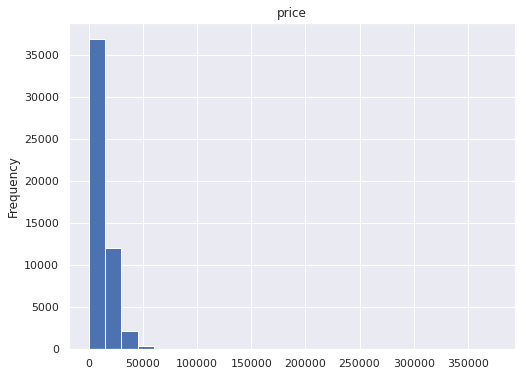

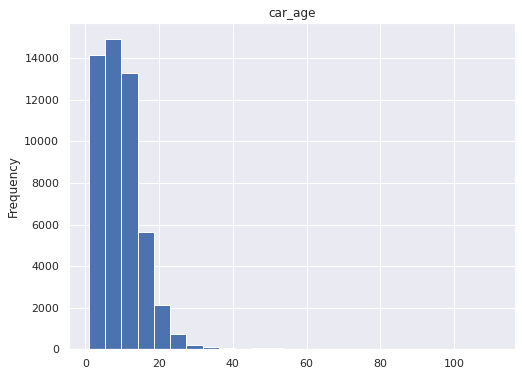

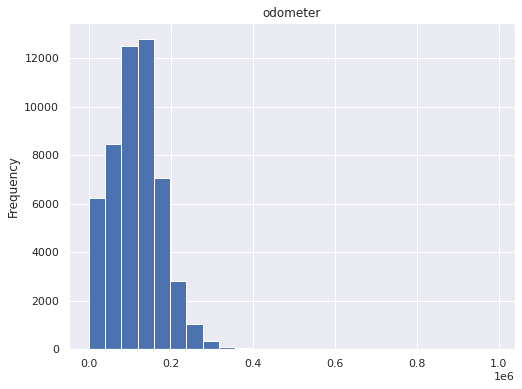

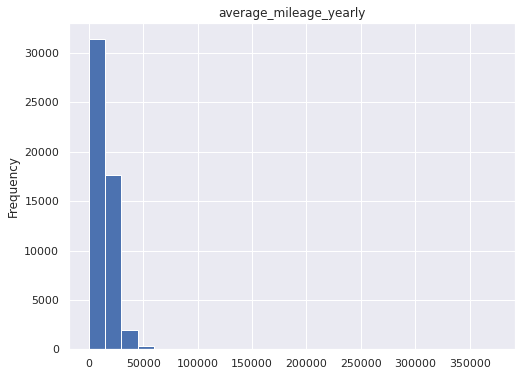

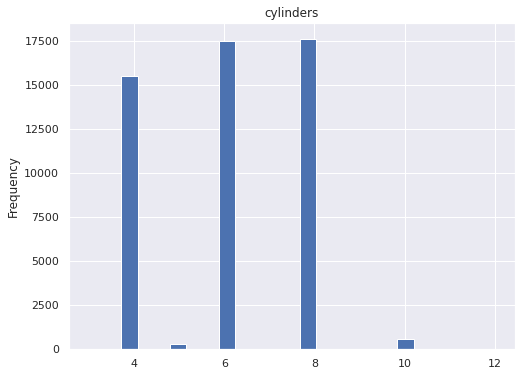

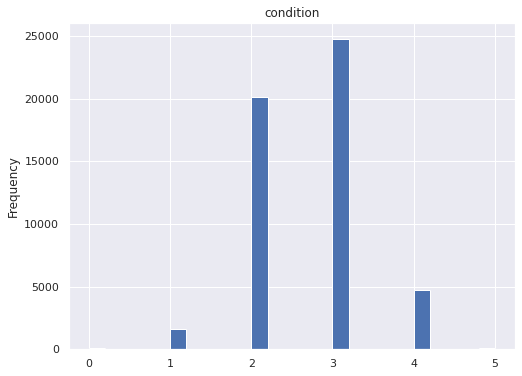

In [113]:
# histogramas de crank
sns.set(rc={'figure.figsize':(8,6)})
for col in crank_parameters:
    crank_parameters[col].plot(kind="hist", bins=25, title=col)
    plt.show()

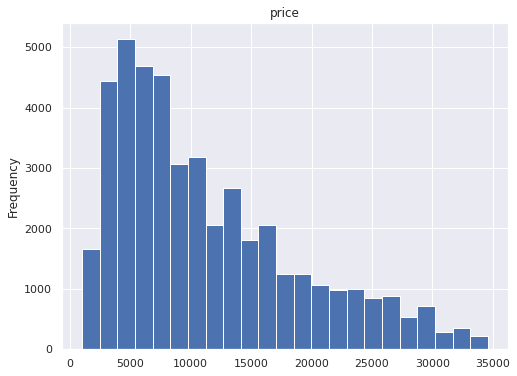

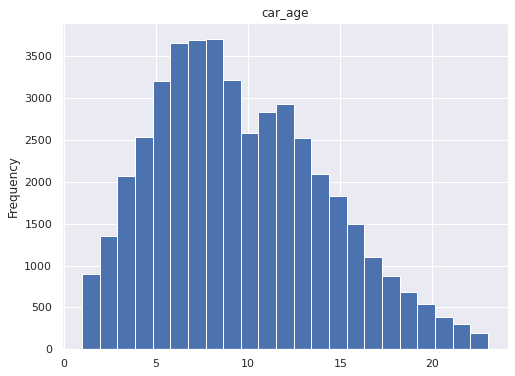

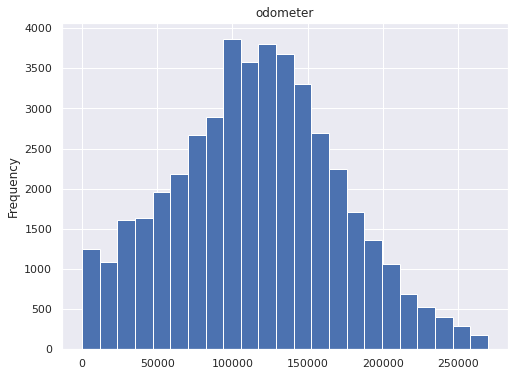

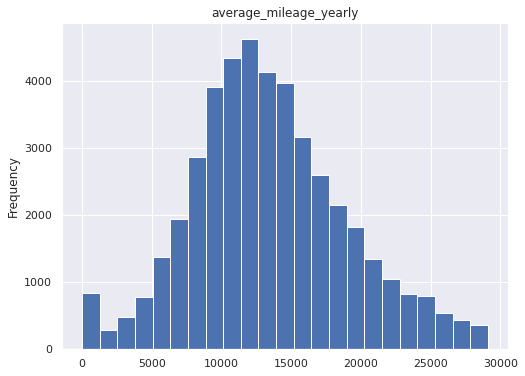

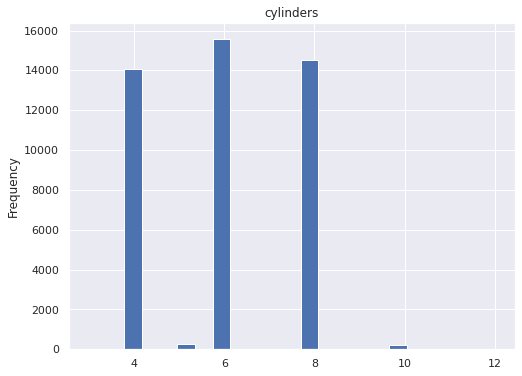

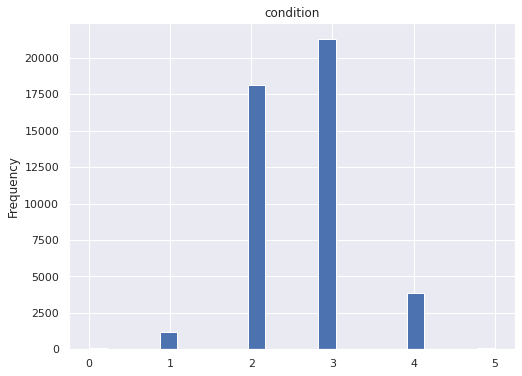

In [114]:
# histogramas de good_data
for col in good_data_parameters:
    good_data_parameters[col].plot(kind="hist", bins=23, title=col)
    plt.show()

Al disminuir los valores atípicos se puede observar que al momento de graficar los histogramas, hay más detalle de la información y distribución de los datos. En el caso de `price` vemos que hay una gran cantidad de datos que está inclinado a la izquierda, siendo no tan simétrica. La mayoría de precios oscilan entre 2500 a 7500. 

En `car_age` está más suavizado la curva, pero de igual forma más inclinada hacia la izquierda. La mayoría de carros tienen una edad de 2 a 12 años. 

`odometer` y `average_mileage_yearly` son los parámetros que tienen un comportamiento más normal en relación a los otros. En este caso, la mayoría de carros tienen un millaje recorrido entre 10,000 a 15,000. Esto, en relación con el histograma de `condition`, se puede observar que realmente la mayoría de carros tienen una condición excelente y buena, ya que no son carros muy usados. En cuanto a los cilindros, la mayoría oscila entre 4 a 8 cilindros. 

La idea de eliminar los datos atípicos es poder observar mejor el comportamiento de los datos y la curva, ya que al tener datos atípicos, el detalle es difuso por extender los extremos. Al no eliminar estos datos, se genera ruido cuando se comienza a estudiar de forma más detallada y puede influenciar en el resultado de las hipótesis a comprobar. 

[Volver a Contenidos](#back)

<div id='estud_anuncios'/>

## Periodo de colocación de los anuncios 

A continuación, se estudiará el parámetro `days_listed`, para entender cuántos días fueron mostrados los anuncios. Esto se realizará con un histograma y se obtendrá un resumen estadístico

<AxesSubplot:title={'center':'Days_listed histogram'}, ylabel='Frequency'>

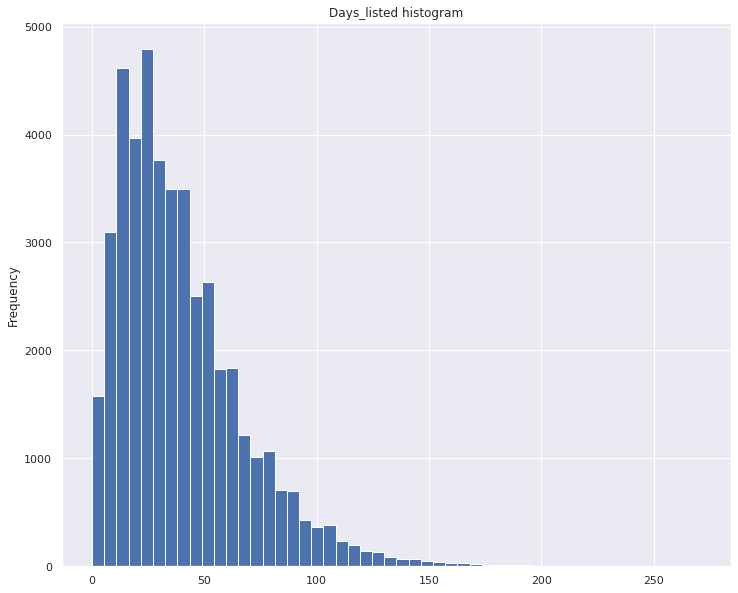

In [115]:
# histograma days_listed
sns.set(rc={'figure.figsize':(12,10)})
good_data["days_listed"].plot(kind="hist", title="Days_listed histogram", bins=50)

In [116]:
# resumen estadístico
good_data["days_listed"].describe()

count    44669.000000
mean        39.560187
std         28.241251
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Se puede observar arriba el histograma de los días que son publicados los anuncios. Generalmente la mayoría de los anuncios de carros oscilan estre 0 a 50 días publicados, siendo su media 40 días, y su mediana 33 días. 

Se tienen casos de anuncios que han llegado a publicarse 271 días, siendo el caso más extremo, aunque hay algunos que si llegan entre los 100 a los 150. 

Estudiemos más a fondo, y verifiquemos cuáles son los días que más se repiten.

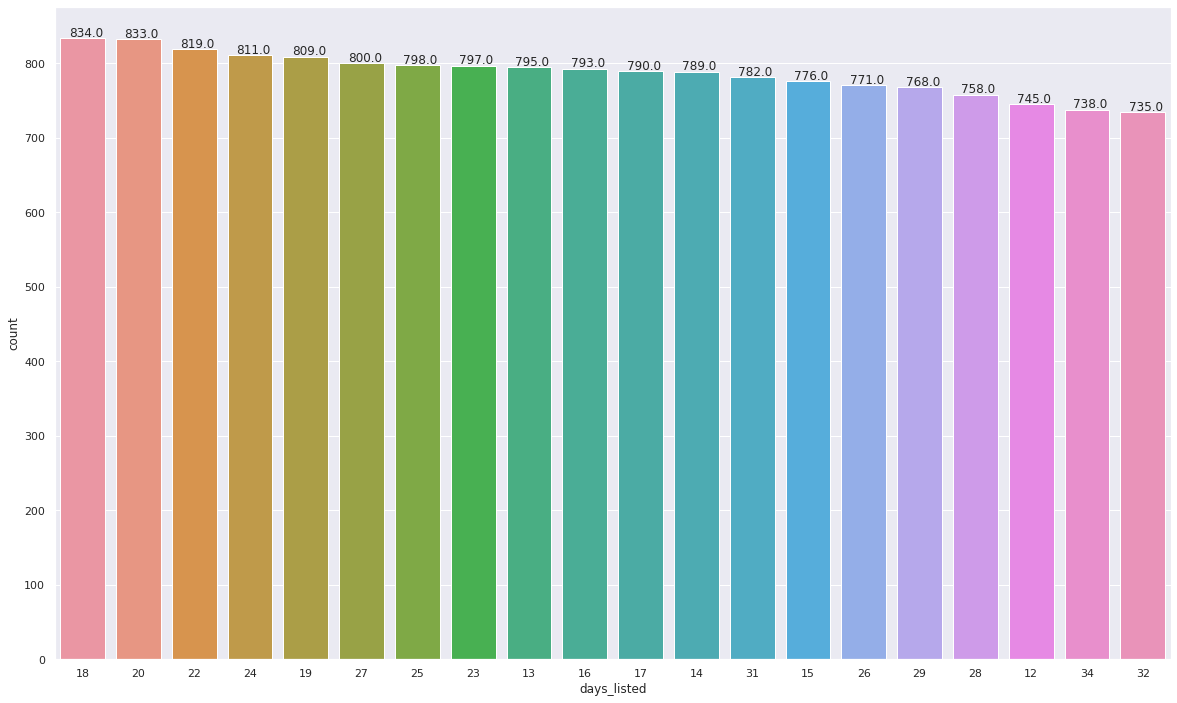

In [117]:
# countplot de valores más repetidos en price
sns.set(rc={'figure.figsize':(20,12)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="days_listed", 
                   data=good_data, 
                   order=good_data.days_listed.value_counts().iloc[:20].index
                  )

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))

En el gráfico de arriba se observa los primeros 20 días de los anuncios que más se repiten. El primero siendo 20 días con 824 anuncios; los primeros 5 días que permanece un anuncio oscilan entre 18 a 27 días. Entre los 20 días de anuncios que más se repiten, van entre 13 a 34 días. 

Por lo tanto, se podría decir que la vida útil habitual de un anuncio va entre 13 a 34 días, siendo estos los que más se repiten. 

Verifiquemos para los casos extremos, donde los anuncios llegan a cumplir 150 días o más. 

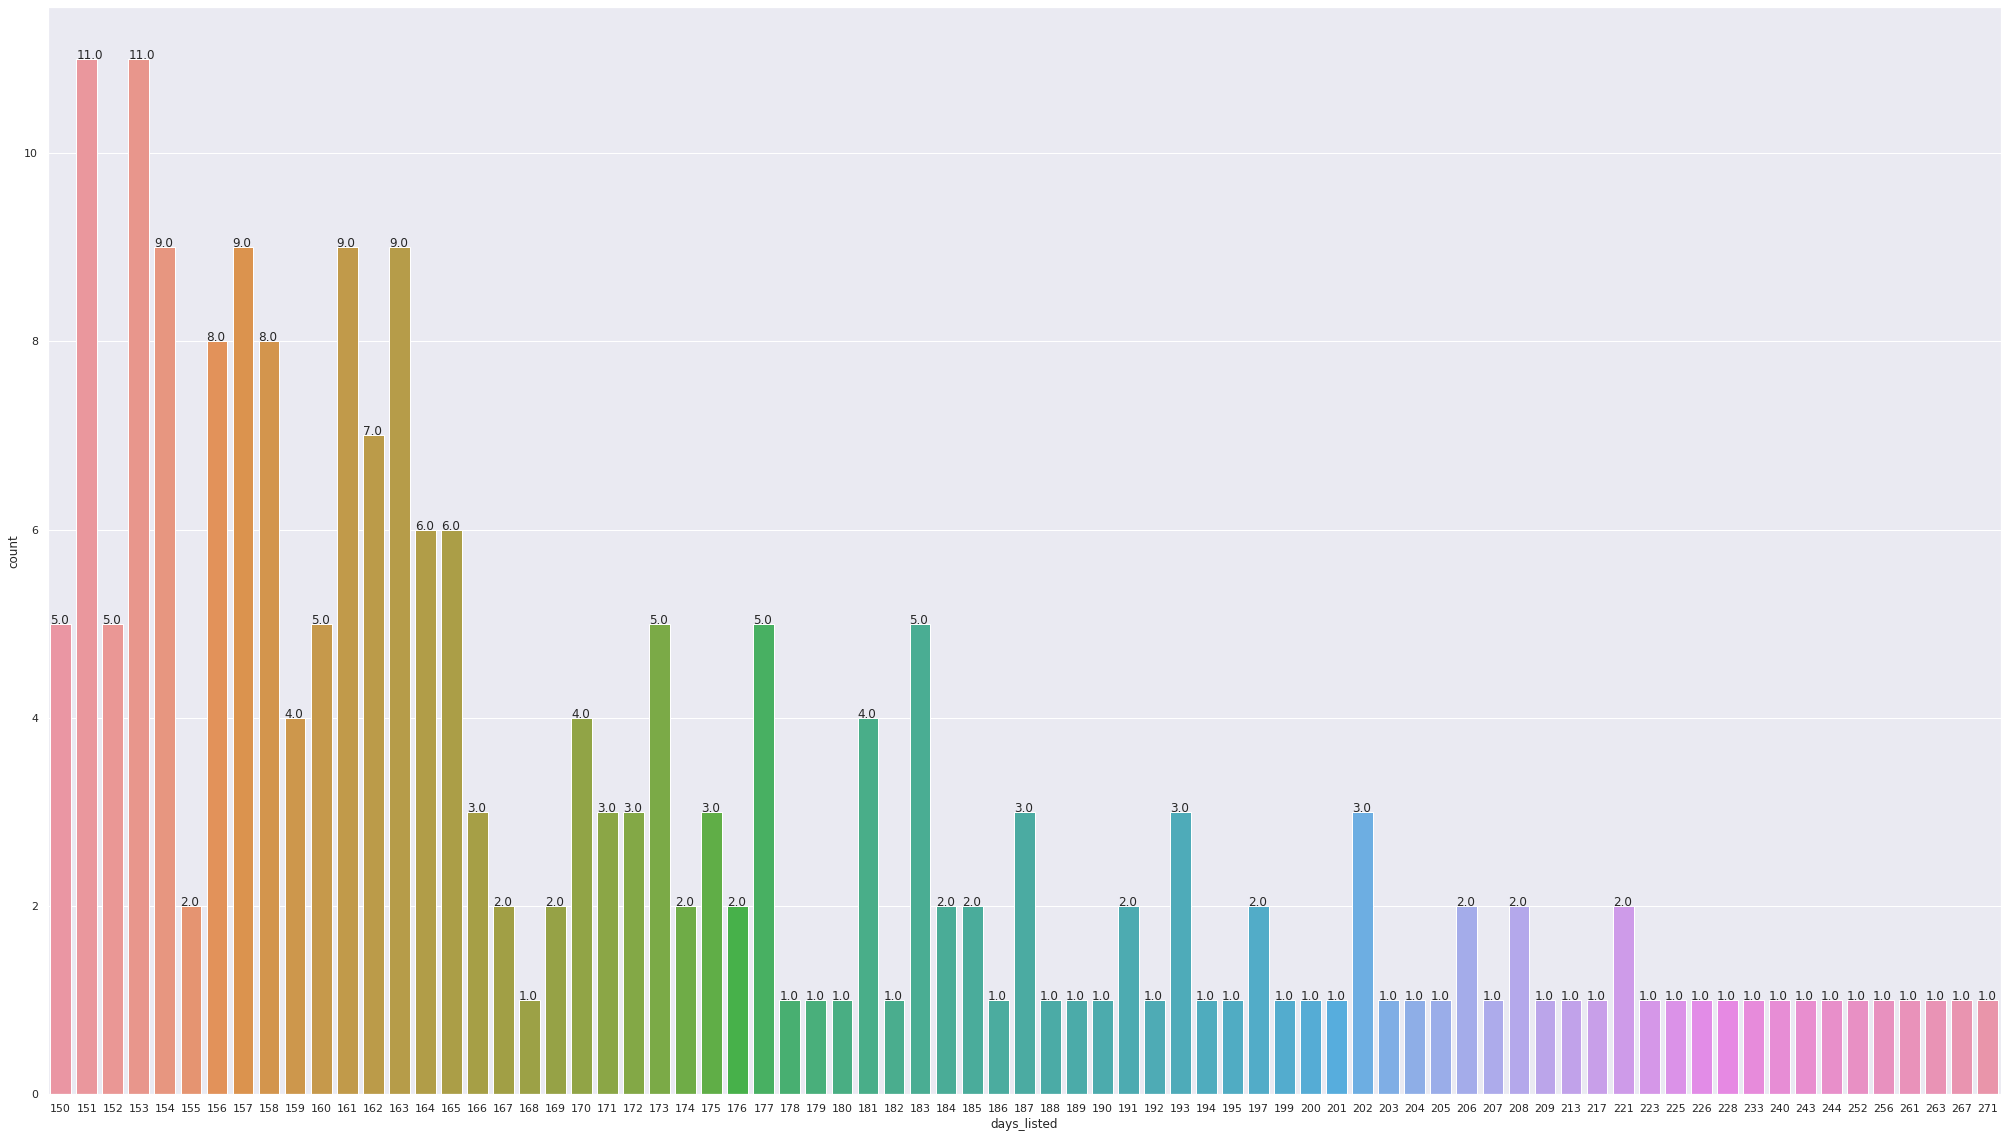

In [118]:
# countplot de valores más repetidos
less_data = good_data.query('150 <= days_listed <= 271')

sns.set(rc={'figure.figsize':(35,20)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="days_listed", 
                   data=less_data
                  )

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

Se observa en el countplot todos los datos que se repiten entre 150 a 271 días. En este rango, el valor que más se repite es 153, y a partir del día 223 para arriba, ya la cantidad de anuncios solo llega a ser 1, por lo que son casos extremos. 

Estudiemos más a fondo qué implica que un anuncio sea eliminado de forma rápida y también los que son publicados por un tiempo anormalmente largo. 

Para esto realicemos una matriz de dispersión y un análisis de correlación para identificar qué variables impacta en `days_listed`:

In [119]:
# separación de parámetros interesados
good_data_parameters = good_data.loc[:, ("days_listed", "model_year", "price", 
                                         "car_age", "odometer")]

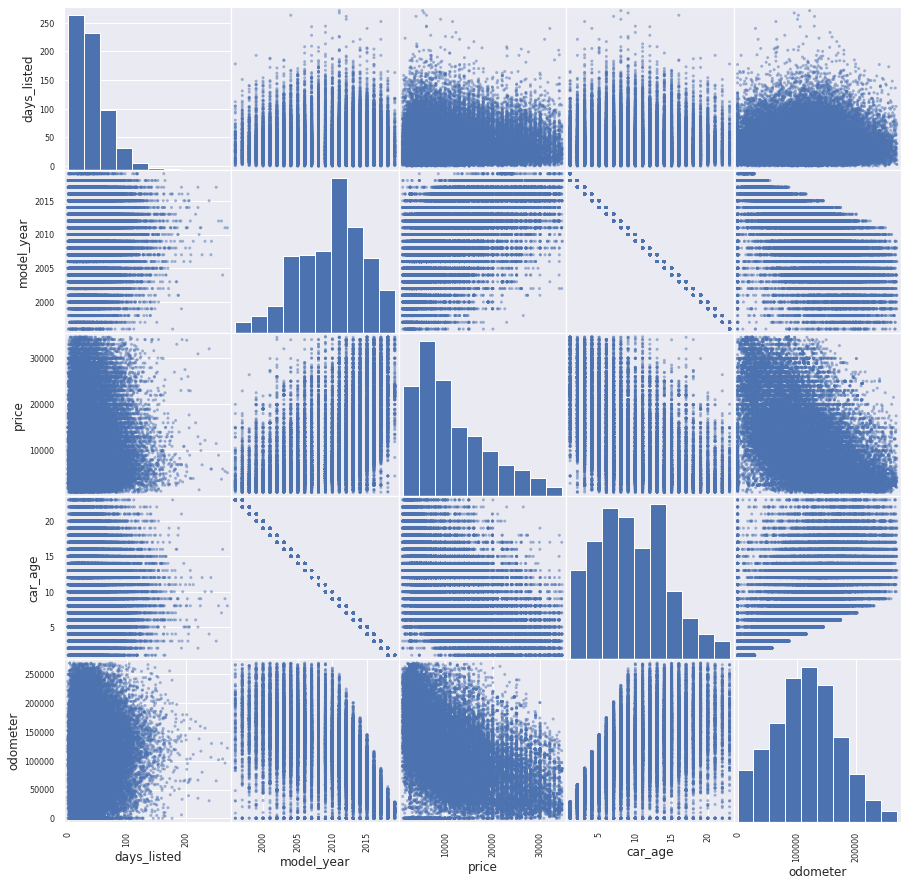

In [120]:
# matriz de dispersión
pd.plotting.scatter_matrix(good_data_parameters, figsize=(15,15))
plt.show()

In [121]:
# correlación
good_data_parameters.corr()

,days_listed,model_year,price,car_age,odometer
days_listed,1.000000,-0.001580,-0.003847,0.002600,0.003818
model_year,-0.001580,1.000000,0.568902,-0.995385,-0.618532
price,-0.003847,0.568902,1.000000,-0.566785,-0.507558
car_age,0.002600,-0.995385,-0.566785,1.000000,0.616573
odometer,0.003818,-0.618532,-0.507558,0.616573,1.000000


Como se observa la matriz de correlación y de dispersión, en relación a `days_listed` no hay ninguna variable que afecta de forma negativa o positiva directamente. En este caso, se concluye que se debe analizar con varias variables para ver qué implica que un anuncio esté publicado más días o menos días. 

Segmentamos los valores de los días entre 0 a 10, siendo los días que más pronto se desaparece un anuncio, y el otro segmento entre 150 a 271 días, siendo los días que más se demora un anuncio en permanecer. 

In [122]:
# segmentos de datos
less_days = good_data.query('0 <= days_listed <= 10')
more_days = good_data.query('150 <= days_listed <= 271')

Se crea de nuevo los segmentos solo de esos parámetros para verificar las matrices de dispersión

In [123]:
# separación de parámetros interesados
less_days_parameters = less_days.loc[:, ("days_listed", "model_year", "price", 
                                         "car_age", "odometer")]
more_days_parameters = less_days.loc[:, ("days_listed", "model_year", "price", 
                                         "car_age", "odometer")]

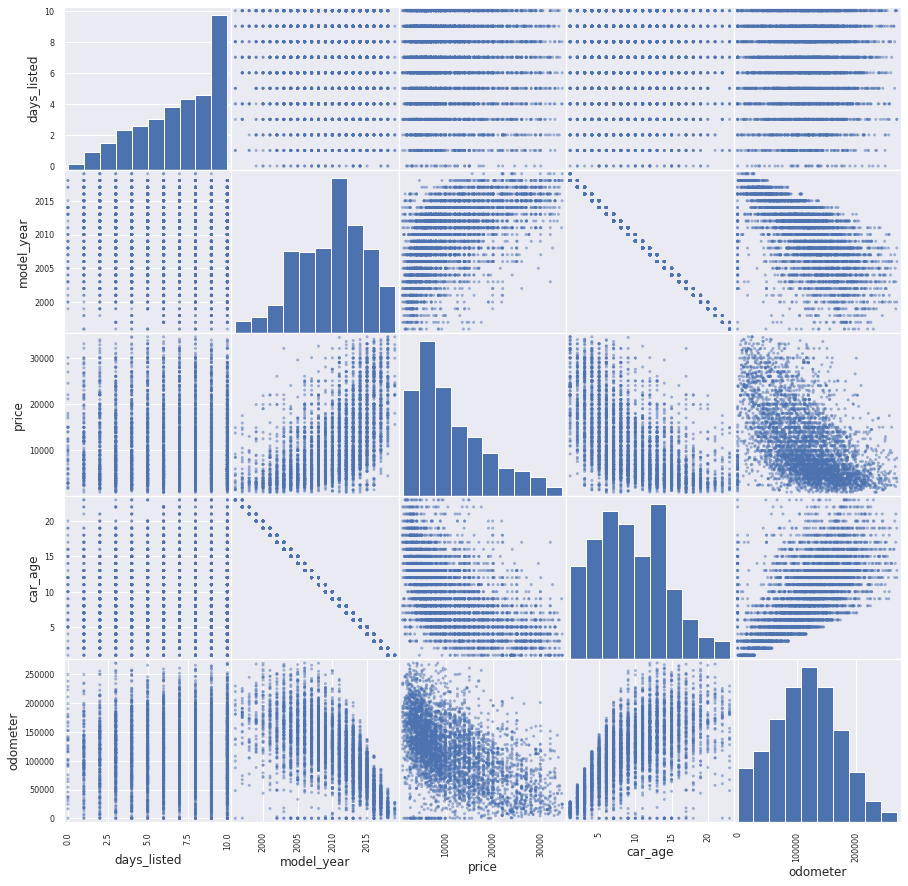

In [124]:
# matriz de dispersión
pd.plotting.scatter_matrix(less_days_parameters, figsize=(15,15))
plt.show()

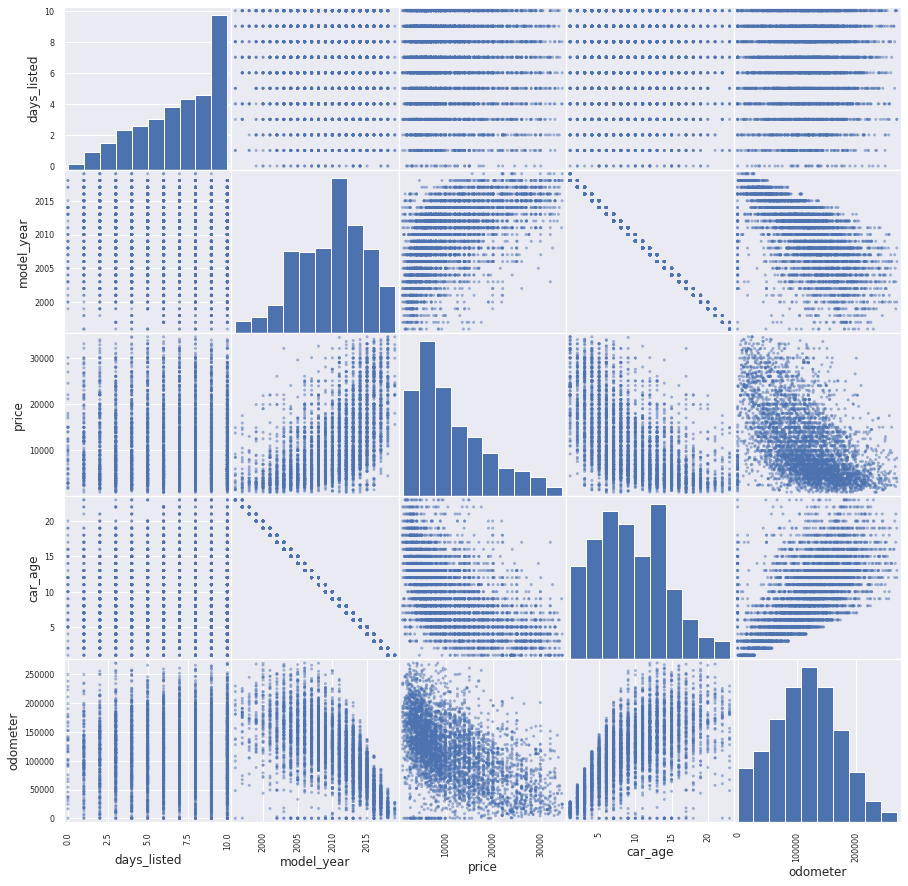

In [125]:
# matriz de dispersión
pd.plotting.scatter_matrix(more_days_parameters, figsize=(15,15))
plt.show()

Observando ya solo los segmentos entre `days_listed` y el resto de variables, vemos que no hay un patrón definido, solo hay puntos entre cada segmento de días. 

Por lo tanto, la última opción es revisar los promedios de esos días entre las variables `price`, `car_age` y `odometer` que son las variables que más nos llaman la atención analizar.

Se realiza primero para `less_days`

In [126]:
# pivot_table
less_days_table = pd.pivot_table(less_days, 
                                 values=["price", "car_age", "odometer"], 
                                 index="days_listed", 
                                 aggfunc=["mean", "median"], 
                                margins = True)
less_days_table

mean                               median                
               car_age       odometer         price car_age  odometer price
days_listed                                                                
0            10.340426  121359.191489  10897.404255      10  121000.0  9950
1             9.038710  107237.293548  12121.735484       8  105443.0  9600
2             8.766520  111374.063877  12279.885463       8  118381.0  9995
3             9.366864  118337.908284  11634.130178       9  118766.5  9925
4            10.047745  115361.005305  11208.551724      10  113899.0  8800
5             9.041860  113191.326744  11454.188372       8  109707.0  8995
6             9.752345  117218.768293  11140.658537       9  120126.0  8785
7             9.562189  115974.116915  11026.529022       9  118576.0  8900
8             9.411024  116891.755118  11530.074016       9  118545.0  9295
9             9.326466  114445.438193  11026.873217       9  117974.0  8900
10            9.496392  117162.979076  11136.756133       9  118576.0  8915
All           9.450632  115616.713215  11318.512744       9  117000.0  8995

Ahora se realiza lo mismo para `more_days`

In [127]:
# pivot_table
more_days_table = pd.pivot_table(more_days, 
                                 values=["price", "car_age", "odometer"], 
                                 index="days_listed", 
                                 aggfunc=["mean", "median"], 
                                margins = True)
more_days_table

mean                               median                   
               car_age       odometer         price car_age  odometer    price
days_listed                                                                   
150           7.800000  104174.300000   9564.400000     8.0  119000.0   4995.0
151          10.818182  140625.181818   9759.090909    11.0  161000.0   7200.0
152           6.600000   83231.800000  17997.000000     5.0   98000.0  18800.0
153           8.909091  106475.000000  11369.909091     9.0   93136.0   8000.0
154          10.444444  110536.111111  11132.777778     9.0  100004.0   7910.0
...                ...            ...           ...     ...       ...      ...
261           7.000000  130323.000000   3800.000000     7.0  130323.0   3800.0
263          16.000000  103000.000000   5995.000000    16.0  103000.0   5995.0
267           9.000000   96000.000000   5500.000000     9.0   96000.0   5500.0
271           8.000000  122000.000000   5200.000000     8.0  122000.0   5200.0
All           9.412037  117222.578704  10751.162037     9.0  119045.5   8497.5

[76 rows x 6 columns]

Finalmente, evaluando igual con el promedio y la mediana, solo de los datos segmentados, se puede observar que se obtiene los mismos valores de `price`, `odometer` y `car_age`, concluyendo que no hay una razón específica entre estas variables de por qué un anuncio permanece publicado mayor tiempo o menor tiempo. 

Abordando de otra forma el problema, también se puede simplificar esto verificando la información de las columnas `days_listed` y `price`, al observar cómo cambia la información según el tipo de carro (`type`). La idea es obtener el total de anuncios por tipo de carro y ver cómo es el precio promedio. 

In [128]:
# pivot_table
days_listed_table = pd.pivot_table(good_data, 
                                   values = ["price", "days_listed"], 
                                   aggfunc = {"price": "mean", "days_listed": "count"}, 
                                   index = "type")
days_listed_table

,days_listed,price
type,,
SUV,11115,10629.774539
bus,19,19276.947368
convertible,318,13588.455975
coupe,1881,14275.837321
hatchback,940,6941.060638
mini-van,1054,7741.602467
offroad,174,14550.787356
other,210,9945.671429
pickup,5898,14973.801628


Con estos datos, procedemos a realizar gráficas de barra. 

<Figure size 2520x1440 with 0 Axes>

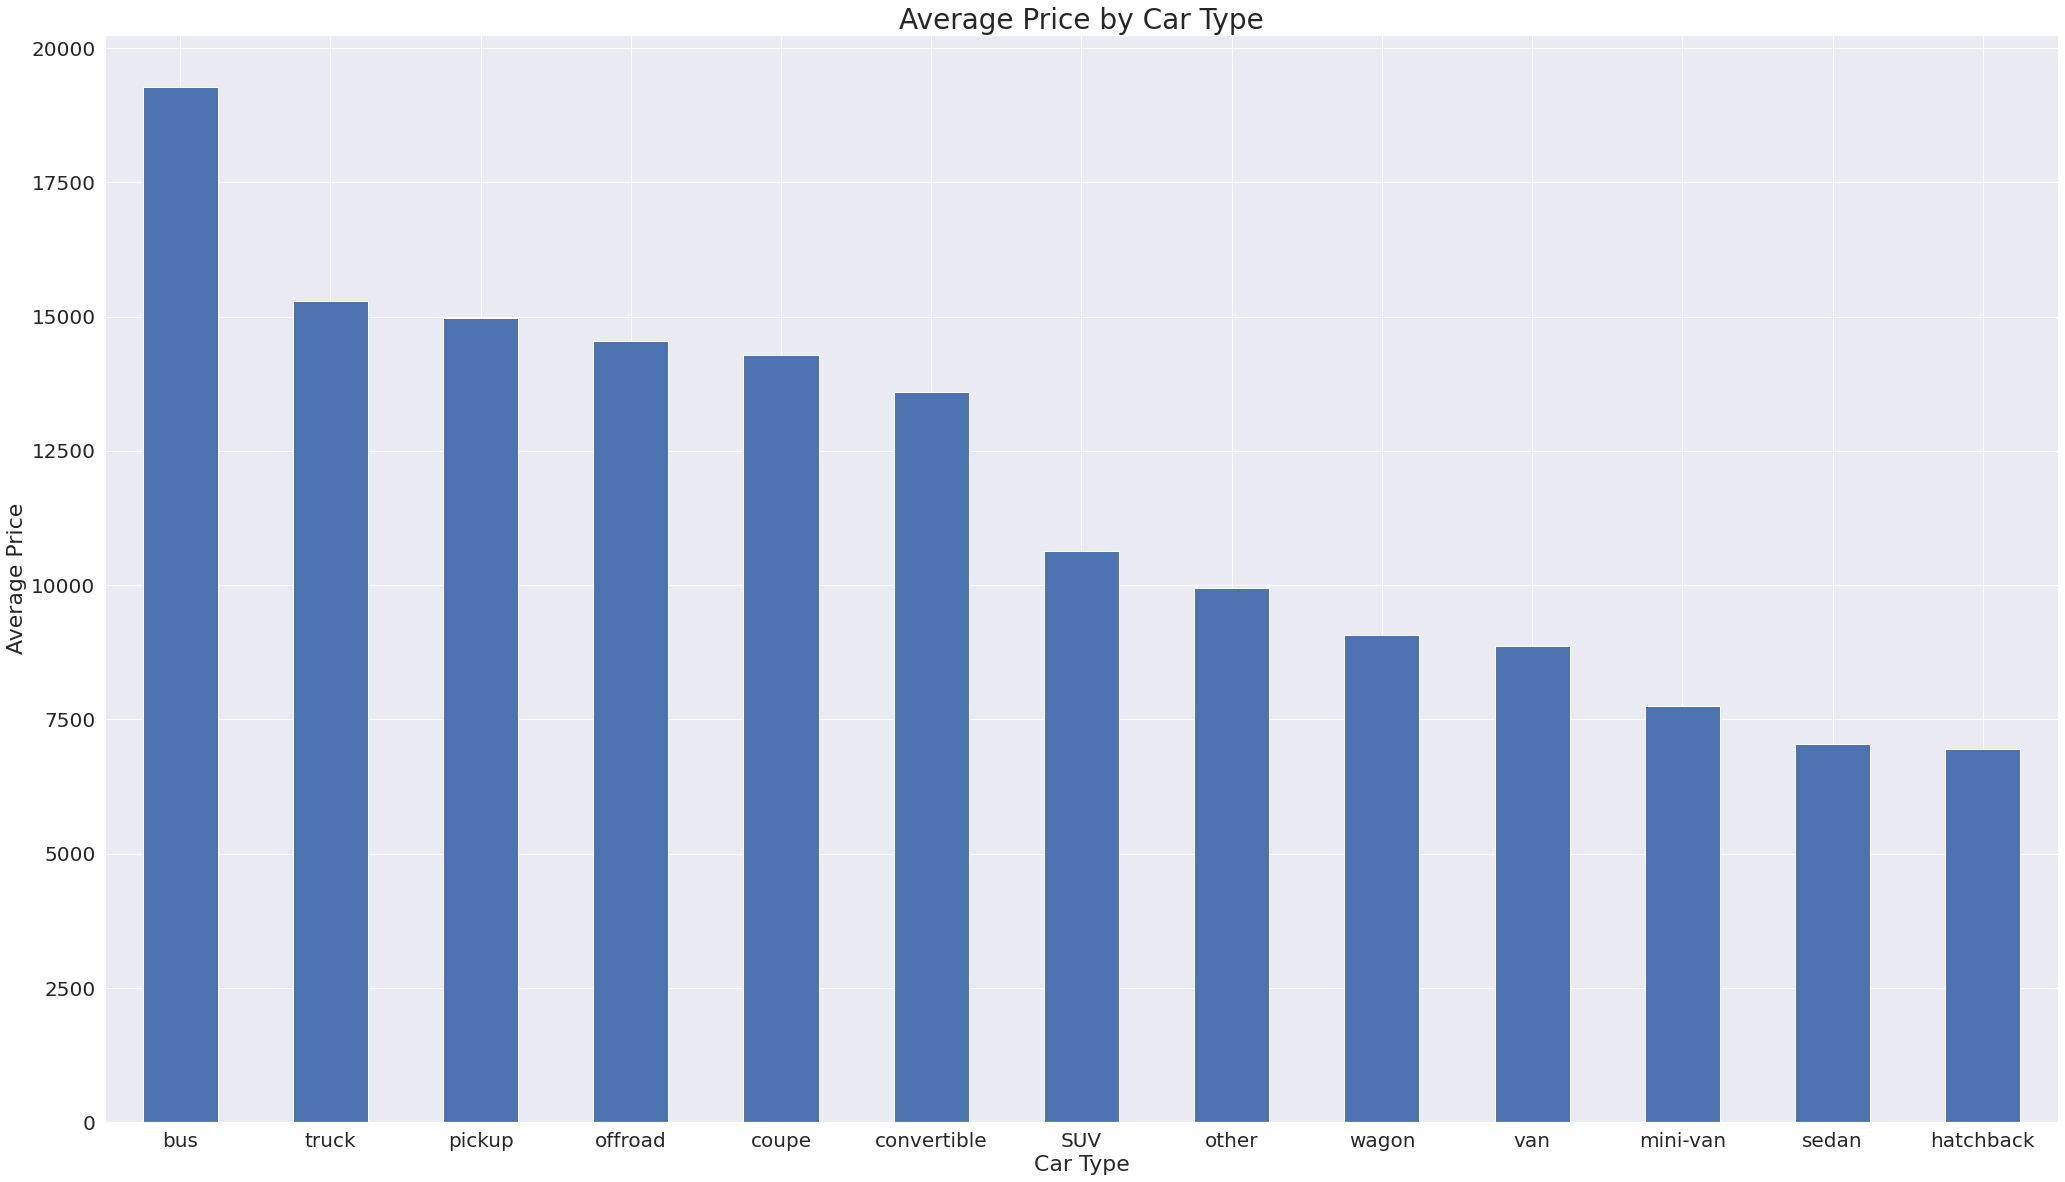

<Figure size 2520x1440 with 0 Axes>

In [129]:
# ordenado de mayor a menor
days_listed_table = days_listed_table.sort_values(by="price", ascending=False)

# gráfico de `price`
ax = days_listed_table["price"].plot.bar(rot=0)
ax.set_title("Average Price by Car Type", fontsize=28)
ax.set_xlabel("Car Type", fontsize=22)
ax.set_ylabel("Average Price", fontsize=22)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# enseñar gráfico
plt.figure()

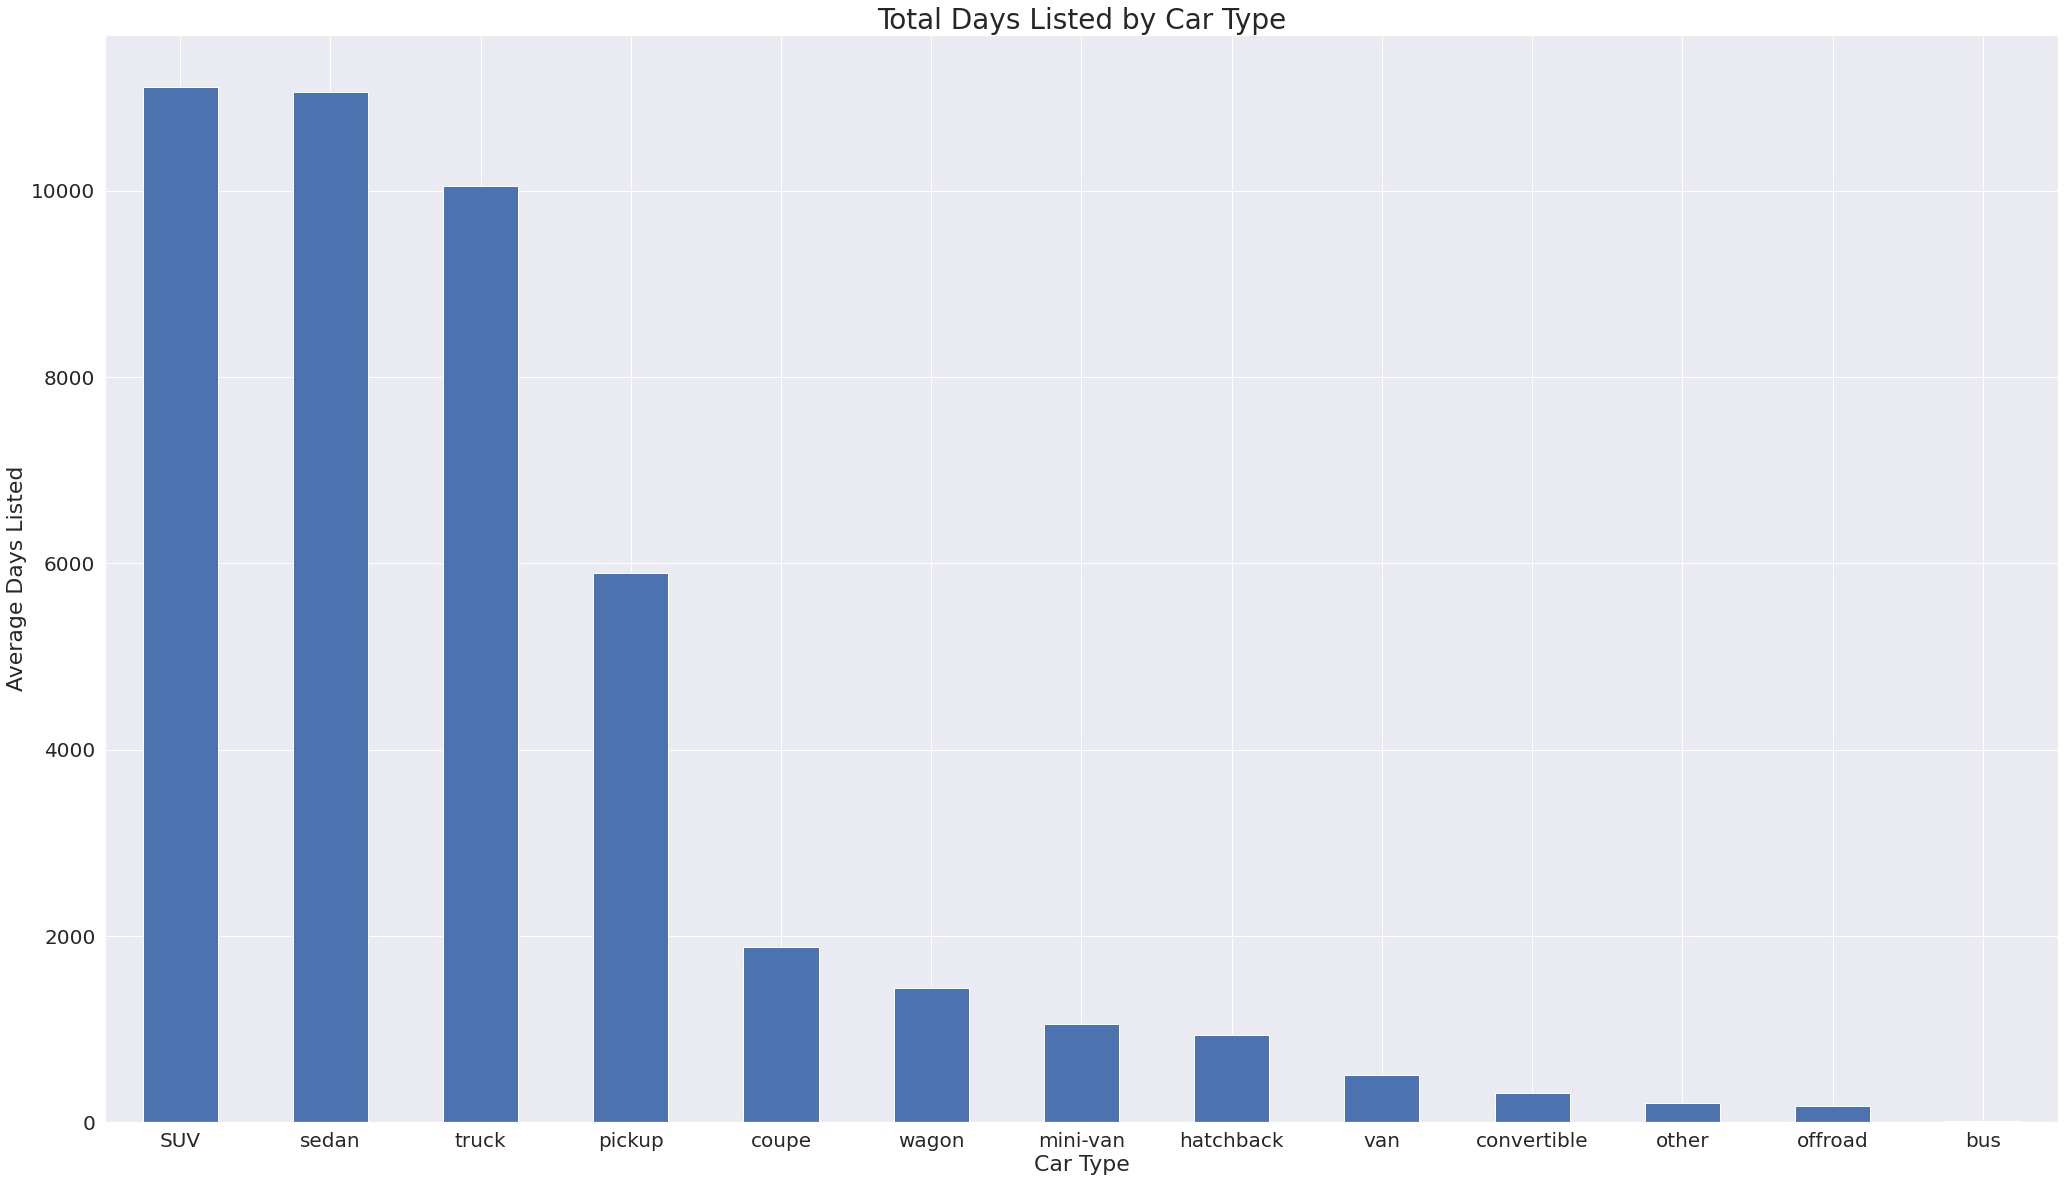

In [129]:
# ordenado de mayor a menor
days_listed_table = days_listed_table.sort_values(by="days_listed", ascending=False)

# gráfico de `average_days_listed`
ax = days_listed_table["days_listed"].plot.bar(rot=0)
ax.set_title("Total Days Listed by Car Type", fontsize=28)
ax.set_xlabel("Car Type", fontsize=22)
ax.set_ylabel("Average Days Listed", fontsize=22)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# enseñar gráfico
plt.show()

Se puede observar que según el tipo de carro, el precio varía, siendo los buses más caros en general que los otros tipos de carros. 

Sin embargo, en el caso de la cantidad de días que está un anuncio el comportamiento varía. Los carros tipo SUV, sedan y truck son los que más permanencia (en días) tienen según los anuncios publicados. De igual forma, estos son los tipos de carros que más se anuncian a nivel general. Por lo tanto el período de colocación varía según el tipo de carro que se publica, pero está de igual forma relacionada según la cantidad de anuncios que se generan a través de los anuncios en total. 

[Volver a Contenidos](#back)

<div id='precio_promedio'/>

## Precio promedio por cada tipo de vehículo

Se analizará el número de anuncios y el precio promedio para cada tipo de vehículo. 

Se realiza un pivot_table para obtener esta información.

In [131]:
# vistazo general
good_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,average_mileage_yearly
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2006,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,13,6823.461538
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,168500.0,automatic,pickup,unspecified,False,2019-03-22,9,4,3,2019,17,9911.764706
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


In [132]:
# pivot_table según type
car_type_table = pd.pivot_table(good_data, 
                                  values="price", 
                                  index="type", 
                                  aggfunc=["mean", "count"]
                                 )
car_type_table.sort_values(("count", "price"), ascending=False)

,mean,count
,price,price
type,,
SUV,10629.774539,11115
sedan,7045.024415,11059
truck,15295.055224,10050
pickup,14973.801628,5898
coupe,14275.837321,1881
wagon,9073.724618,1438
mini-van,7741.602467,1054
hatchback,6941.060638,940


Se obtiene los datos ordenados según la cantidad de anuncios que hay por modelo de carro. 

Los tipos de carros `SUV`, `sedan` y `truck` son los que más anuncios tienen, con un total de 10,917, 10,905 y 9890, con un precio promedio de 10,439, 6,970 y 15,089 respectivamente. 

[Volver a Contenidos](#back)

<div id='fact_precio'/>

## Factores de precio

Filtramos todos los datos para tener solo los tipo `sedan`, `SUV` y `truck`:

In [133]:
# filtro de datos
most_type_cars = good_data.query("type == 'sedan' | type == 'SUV' | type == 'truck'")

In [134]:
# verificación
most_type_cars["type"].unique()

array(['SUV', 'sedan', 'truck'], dtype=object)

In [135]:
# info general
most_type_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32224 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   32224 non-null  int64         
 1   model_year              32224 non-null  int64         
 2   model                   32224 non-null  object        
 3   condition               32224 non-null  int64         
 4   cylinders               32224 non-null  int64         
 5   fuel                    32224 non-null  object        
 6   odometer                32224 non-null  float64       
 7   transmission            32224 non-null  object        
 8   type                    32224 non-null  object        
 9   paint_color             32224 non-null  object        
 10  is_4wd                  32224 non-null  bool          
 11  date_posted             32224 non-null  datetime64[ns]
 12  days_listed             32224 non-null  int64 

Se tiene un total de 31,712 datos en total.

Por último, se verifica qué factores impactan más sobre el precio. Para esto, se analizará el precio junto con las variables `odometer`, `condition`, `car_age`, `transmition` y `paint_color`. 

Para las variables numéricas se utilizará los diagramas de dispersión y para las variables numéricas los gráficos de caja y bigotes.

In [136]:
# división de parámetros
numeric_parameters = most_type_cars.loc[:, ("price", "car_age", "condition", "average_mileage_yearly")]
categorical_parameters = most_type_cars.loc[:, ("price", "transmission", "paint_color")]

Procedemos a realizar los diagramas de dispersión para `numeric_parameters`.

<AxesSubplot:xlabel='car_age', ylabel='price'>

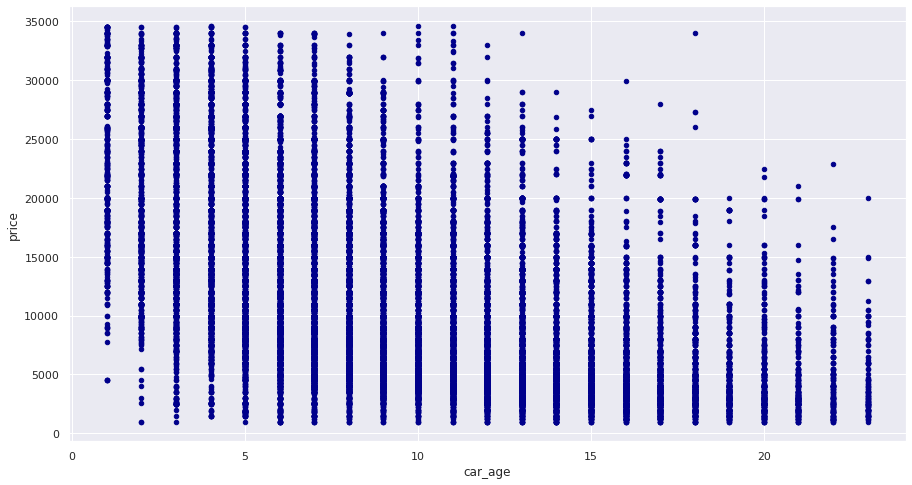

In [137]:
# scatter plot
sns.set(rc={'figure.figsize':(15,8)})
numeric_parameters.plot(x='car_age', y='price', kind='scatter', c='DarkBlue') 

<AxesSubplot:xlabel='condition', ylabel='price'>

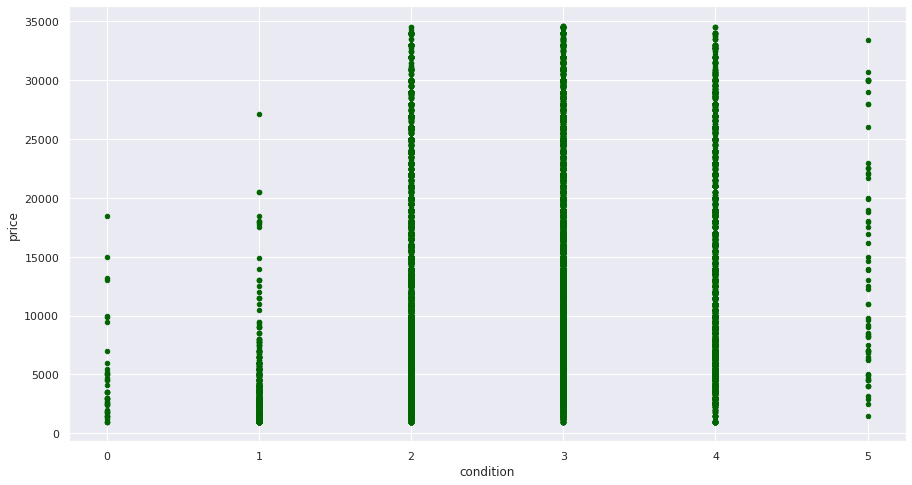

In [138]:
# scatter plot
numeric_parameters.plot(x='condition', y='price', kind='scatter', c='DarkGreen')

<AxesSubplot:xlabel='average_mileage_yearly', ylabel='price'>

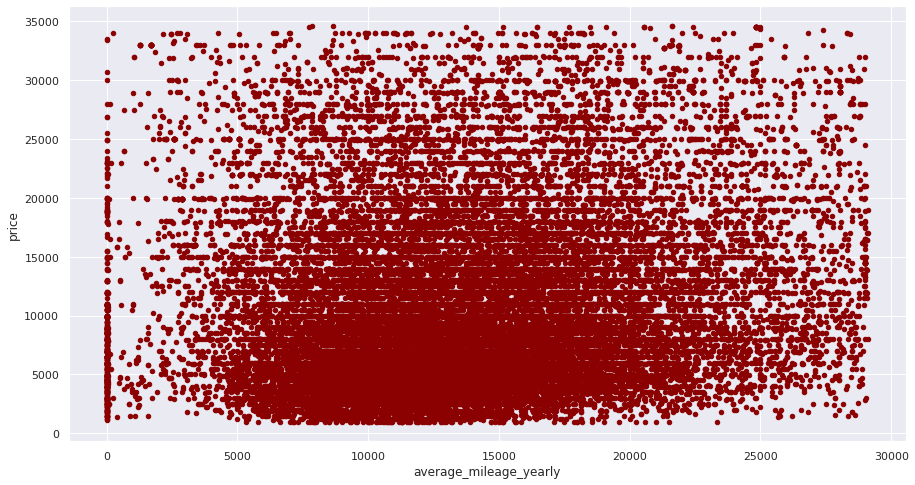

In [139]:
# scatter plot
numeric_parameters.plot(x='average_mileage_yearly', y='price', kind='scatter', c='DarkRed')

Las variables `car_age` y `condition` son variables discretas, que al momento de graficar, se puede observar más como un histograma o de gráfico de distribución. En este caso, la mayor cantidad de datos según `condition` está en 2, 3 y 4. En el caso de `car_age` los datos están distribuidos de forma igual desde 0 hasta 10 y de ahí poco a poco va disminuyendo en comparación con el precio. En el caso de `average_mileage_yearly` se ve que no hay mucha variación al inicio y de ahí se va dispersando poco a poco los datos según el precio y el millaje promedio. En este caso se ve que el precio no es influenciado por otras variables. 

In [140]:
# correlación
numeric_parameters.corr()

,price,car_age,condition,average_mileage_yearly
price,1.000000,-0.535208,0.230081,0.160733
car_age,-0.535208,1.000000,-0.314767,-0.469674
condition,0.230081,-0.314767,1.000000,0.038545
average_mileage_yearly,0.160733,-0.469674,0.038545,1.000000


Según los diagramas de dispersión y la matriz de correlación, se puede detectar una correlación negativa entre `price` y `car_age`. Esto quiere decir, entre mayor edad, menor será su precio. 

En las variables `condition` y `average_mileage_yearly` tienen una correlación positiva muy pequeña en relación a `price`. Esto quiere decir que influyen muy poco.

Ahora veamos la información en `paint_color`: 

In [141]:
# pivot_table
paint_color_table = pd.pivot_table(categorical_parameters, 
                                   values="price", 
                                   index="paint_color", 
                                   aggfunc=["mean", "count"]
                                  )
paint_color_table.sort_values(("count", "price"), ascending=False)

,mean,count
,price,price
paint_color,,
white,12494.075269,6045
unspecified,10968.286315,5707
black,12083.478677,4807
silver,9633.521458,4171
grey,10033.692285,3344
blue,9518.796563,2851
red,10337.648887,2606
green,8723.760580,827


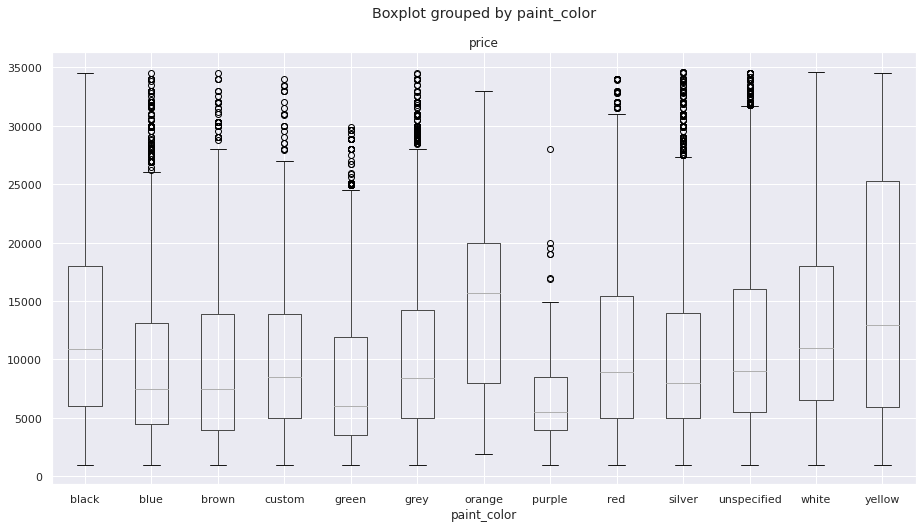

In [142]:
# for loop para graficar boxplots
sns.set(rc={'figure.figsize':(15,8)})
boxplot = good_data.boxplot(by="paint_color", column=["price"])

En el caso de los colores en relación al carro, se puede decir que no hay mucha diferencia entre sí, el precio promedio entre colores están casi iguales todos. Los que más resaltan son el color `orange` y `yellow` teniendo un promedio mayor que el resto e incluyo el `yellow` alcanzando un máximo más alto sin valores atípicos, es decir, sus bigotes superiores más largos. Se podría decir que los colores más cotizados al momento de vender un vehículo en Crankshaft List son el amarillo y el naranja, poniendo un precio por lo menos de 15,000, tomando en cuenta que depende del tipo de carro y modelo. 

Revisemos la información de `transmission`:

In [143]:
#pivot_table
transmission_table = pd.pivot_table(categorical_parameters, 
                                   values="price", 
                                   index="transmission", 
                                   aggfunc=["mean", "count"]
                                  )
transmission_table.sort_values(("count", "price"), ascending=False)

,mean,count
,price,price
transmission,,
automatic,10927.564467,30659
manual,8964.604057,1331
other,12034.559829,234


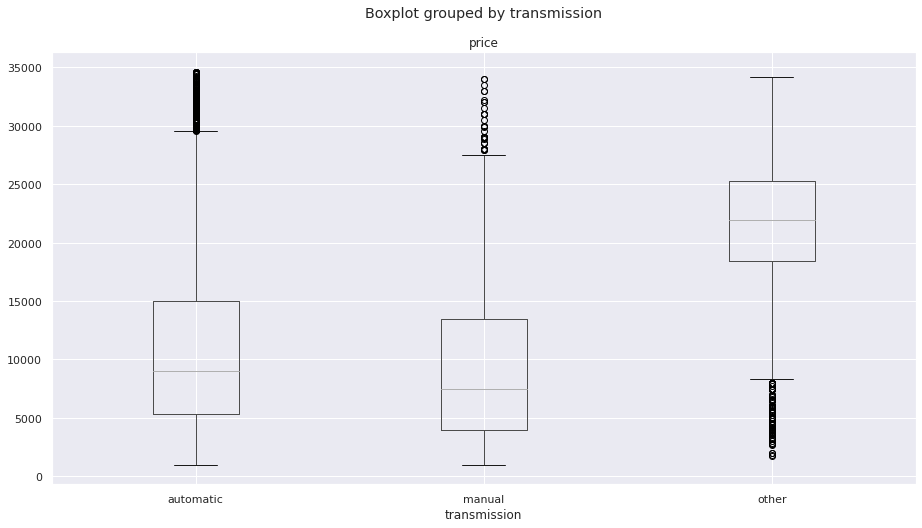

In [144]:
# for loop para graficar boxplots
sns.set(rc={'figure.figsize':(15,8)})
boxplot = good_data.boxplot(by="transmission", column=["price"])

En cuanto al tipo de transmisión, se nota claramente que la categoría `otro` tiene precios más altos que automático y manual. En este caso, habrá que analizar con más detalle la información de los autos. 

[Volver a Contenidos](#back)

<div id='end'/>

## Conclusión general

A nivel general, los datos de Crankshaft List tenían en varias variables datos ausentes, lo que permitió realizar una limpieza profunda en los datos. 

Las columnas que tenían valores ausentes son las siguientes: 
- is_4wd
- paint_color
- odometer
- cylinders
- model_year

Todas estas variables se limpio profundamente sus valores ausentes, donde no se eliminó, sino se rellenó o completó según información de otras columnas. La razón principal de todo esto, era no perder información valiosa de los datos. Columnas como `is_4wd` era fácilmente rellenable, pero otras como `model_year` se rellenó según información de otras variables. De esta forma se mantuvo la información estadística inicial, sin sesgar la información hacia uno u otro extremo.  

Se procedió estudiar los datos atípicos de los siguientes parámetros: 
- price
- car_age
- odometer
- average_mileage_yearly
- cylinders
- condition

En las variables `price`, `car_age`, `odometer` y `average_mileage_yearly` se fijaron nuevos límites superiores e inferiores según el rango intercuartil de cada uno. Con esto se estudió la estructura de los datos utilizando histogramas y diagramas de cajas y bigotes, viendo el cambio progresivo por estos datos. En las columnas `cylinders` y `condition` no se modificaron los límites. 

Se encontró que generalmente los anuncios permanecen en línea entre 0 a 271 días, teniendo un promedio de 40 días y una mediana de 33 días. Sin embargo no se encontró una razón específica de por qué los anuncios desaparecen de forma rápida (entre 0 a 10 días) y por qué otros permanencen más tiempo (entre 150 a 271 días), ya que a nivel general tenían el mismo comportamiento. 

Otro dato importante a resaltar es que los tipos de carros `SUV`, `sedan` y `truck` son los que más anuncios tienen en la base de datos, con un total de 10,917, 10,905 y 9890, con un precio promedio de 10,439, 6,970 y 15,089 respectivamente. Este dato es importante para promocionar a las personas que quieren vender este tipo de carro, como también a los que están interesados en comprar estos tipos de carros.  

Finalmente, se analizó qué factores impactan más en el precio de un auto según la información de Crankshaft List. En cuanto a las variables numéricas, se detectó que el precio tiene una correlación negativa con la variable edad del carro, ya que entre esta variable, suele suceder (no en todos los casos) que el precio disminuya. De igual forma, de cierta manera influye la condición del carro y el millaje promedio anual, pero en menor impacto de lo que se pensaría en un inicio. En cuanto a las variables categóricas, los colores con un precio más alto son el anaranjado y amarillo, al igual que otro tipo de transmisión en los carros. 

[Volver a Contenidos](#back)